# Get full time series data for:

entire Niskin data set /Nuts/Temp

measures of mixing:
- MLD2015 (own reanalysis of time series data)
- MLD2019 (own reanalysis of time series data)
- X21°C (own reanalysis of time series data)

measures of productivity: 
- Tchla HPLC
- Tchla fluoresence
- POC
- ...?


## 1. niskin data set DMO - read!

In [2]:
#install.packages("ncdf4")

In [113]:
require(ncdf4, warn.conflicts = FALSE);
require(ggplot2, warn.conflicts = FALSE);
require(cowplot, warn.conflicts = FALSE);
require(tidyverse, warn.conflicts = FALSE);
require(oce)

In [11]:
# open a NetCDF file
niskdat <- nc_open("Data/niskin.netcdf")

#print(niskdat)

# Read entire ncdf file to r DataFrame

In [12]:
niskdat_df <- data.frame("Num" = 1:niskdat$dim$unlimited$len)
print('start')
for(i in 1:niskdat$nvars){
    #print(i)
    niskdat_df[paste(attributes(niskdat$var)$names[i])] <- ncvar_get(niskdat, attributes(niskdat$var)$names[i])
}
print('done reading')
head(niskdat_df)

[1] "start"
[1] "done reading"


,Num,Cruise_number,Cruise_ID_1,Cruise_ID_2,Leg,Day,Month,Year,Latitude,Longitude,⋯,Bact_Biomass_uMC,Bio_cast_no,ISO_DateTime_start_hc_local,ISO_DateTime_end_hc_local,ISO_DateTime_start_bc_local,ISO_DateTime_end_bc_local,ISO_DateTime_start_hc_UTC,ISO_DateTime_end_hc_UTC,ISO_DateTime_start_bc_UTC,ISO_DateTime_end_bc_UTC
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,1,93HG_001,CAR-001,2,8,11,1995,10.5,-64.667,⋯,BM_master,2,1995-11-08T06:12:00,1995-11-08T06:38:00,1995-11-08T03:36:00,1995-11-08T03:54:00,1995-11-08T10:12:00,1995-11-08T10:38:00,1995-11-08T07:36:00,1995-11-08T07:54:00
2,2,1,93HG_001,CAR-001,2,8,11,1995,10.5,-64.667,⋯,BM_master,2,1995-11-08T06:12:00,1995-11-08T06:38:00,1995-11-08T03:36:00,1995-11-08T03:54:00,1995-11-08T10:12:00,1995-11-08T10:38:00,1995-11-08T07:36:00,1995-11-08T07:54:00
3,3,1,93HG_001,CAR-001,2,8,11,1995,10.5,-64.667,⋯,BM_master,2,1995-11-08T06:12:00,1995-11-08T06:38:00,1995-11-08T03:36:00,1995-11-08T03:54:00,1995-11-08T10:12:00,1995-11-08T10:38:00,1995-11-08T07:36:00,1995-11-08T07:54:00
4,4,1,93HG_001,CAR-001,2,8,11,1995,10.5,-64.667,⋯,BM_master,2,1995-11-08T06:12:00,1995-11-08T06:38:00,1995-11-08T03:36:00,1995-11-08T03:54:00,1995-11-08T10:12:00,1995-11-08T10:38:00,1995-11-08T07:36:00,1995-11-08T07:54:00
5,5,1,93HG_001,CAR-001,2,8,11,1995,10.5,-64.667,⋯,BM_master,2,1995-11-08T06:12:00,1995-11-08T06:38:00,1995-11-08T03:36:00,1995-11-08T03:54:00,1995-11-08T10:12:00,1995-11-08T10:38:00,1995-11-08T07:36:00,1995-11-08T07:54:00
6,6,1,93HG_001,CAR-001,2,8,11,1995,10.5,-64.667,⋯,BM_master,2,1995-11-08T06:12:00,1995-11-08T06:38:00,1995-11-08T03:36:00,1995-11-08T03:54:00,1995-11-08T10:12:00,1995-11-08T10:38:00,1995-11-08T07:36:00,1995-11-08T07:54:00


## get temp & nuts over depth

In [13]:
cat(names(niskdat_df))

Num Cruise_number Cruise_ID_1 Cruise_ID_2 Leg Day Month Year Latitude Longitude Hydro_cast_no Depth_target Depth_real O2_ml_L q_O2_ml_L O2_umol_kg q_O2_umol_kg NO3_UDO q_NO3_UDO PO4_UDO q_PO4_UDO SiO4_UDO q_SiO4_UDO NH4_USF q_NH4_USF NO2_USF q_NO2_USF NO3_NO2_USF q_NO3_NO3_USF PO4_USF q_PO4_USF SiO4_USF q_SiO4_USF pH q_pH Alkalinity_mol_kg q_Alkalinity_mol_kg Alkalinity_umol_kg q_Alkalinity_umol_kg TCO2 q_TCO2 fCO2 q_fCO2 pH_corrected q_pH_corrected TCO2_corrected q_TCO2_corrected fCO2_corrected q_fCO2_corrected Salinity_bottles q_Salinity_bottles Salinity_CTD q_Salinity_CTD Temperature q_Temperature Sigma_t q_Sigma_t TPP q_TPP PIP q_PIP POC_ug_kg q_POC_ug_kg PON_ug_kg q_PON_ug_kg POC_ug_L q_POC_ug_L PN_ug_L q_PN_ug_L C_N_particulate q_C_N_particulate DON q_DON DOP q_DOP DOC q_DOC TOC q_TOC PrimaryProductivity q_PrimaryProductivity Chlorophyll q_Chlorophyll Phaeopigments q_Phaeopigments Total_Prokaryotes Bact_Biomass_mgC_m3 Bact_Biomass_uMC Bio_cast_no ISO_DateTime_start_hc_local ISO_D

In [205]:
niskdat_df$Day[1]
niskdat_df$Month[1]
niskdat_df$Year[1]

head(unique(as.Date(niskdat_df$ISO_DateTime_start_hc_UTC)))

[1] "8"

[1] "11"

[1] "1995"

[1] "1995-11-08" "1995-12-13" "1995-12-14" "1996-01-12" "1996-02-13"
[6] "1996-03-13"

In [15]:
substr(niskdat_df$ISO_DateTime_end_bc_local[1], 0, 10)

[1] "1995-11-08"

In [16]:
niskdat_df$date <- as.Date(substr(niskdat_df$ISO_DateTime_end_hc_UTC, 0, 10))

niskdat_df$Depth_real <- as.numeric(niskdat_df$Depth_real)
niskdat_df$Depth_target <- as.numeric(niskdat_df$Depth_target)

niskdat_df$Temperature <- as.numeric(niskdat_df$Temperature)
niskdat_df$NO3_NO2_USF <- as.numeric(niskdat_df$NO3_NO2_USF)
niskdat_df$SiO4_USF <- as.numeric(niskdat_df$SiO4_USF)
niskdat_df$PO4_USF <- as.numeric(niskdat_df$PO4_USF)

In [17]:
TempNuts <- data.frame(date = niskdat_df$date, Depth_real = niskdat_df$Depth_real, Temperature = niskdat_df$Temperature, 
                       NO3_NO2_USF = niskdat_df$NO3_NO2_USF, SiO4_USF = niskdat_df$SiO4_USF,
                      PO4_USF = niskdat_df$PO4_USF)

In [18]:
TempNutsAbove250 <- TempNuts[TempNuts$Depth_real<180,]

In [19]:
TempNutsFull_Plot <- ggplot(data=TempNuts, aes(x=Temperature,y=NO3_NO2_USF, col=Depth_real)) + geom_point() + theme_cowplot(20)

In [20]:
TempNutsAbove180_Plot <- ggplot(data=TempNutsAbove250, aes(x=Temperature,y=NO3_NO2_USF, col=Depth_real)) + geom_point() + theme_cowplot(20)

In [21]:
TempPO4Above180_Plot <- ggplot(data=TempNutsAbove250, aes(x=Temperature,y=PO4_USF, col=Depth_real)) + geom_point() + theme_cowplot(20)

In [22]:
TempSiO4Above180_Plot <- ggplot(data=TempNutsAbove250, aes(x=Temperature,y=SiO4_USF, col=Depth_real)) + geom_point() + theme_cowplot(20)

In [23]:
#ggsave('Cariaco.pdf')

## CREATE THESE SAME PLOTS for other nutrients!

Warning message:
“Removed 612 rows containing missing values (geom_point).”
Warning message:
“Removed 311 rows containing missing values (geom_point).”
Warning message:
“Removed 311 rows containing missing values (geom_point).”
Warning message:
“Removed 322 rows containing missing values (geom_point).”


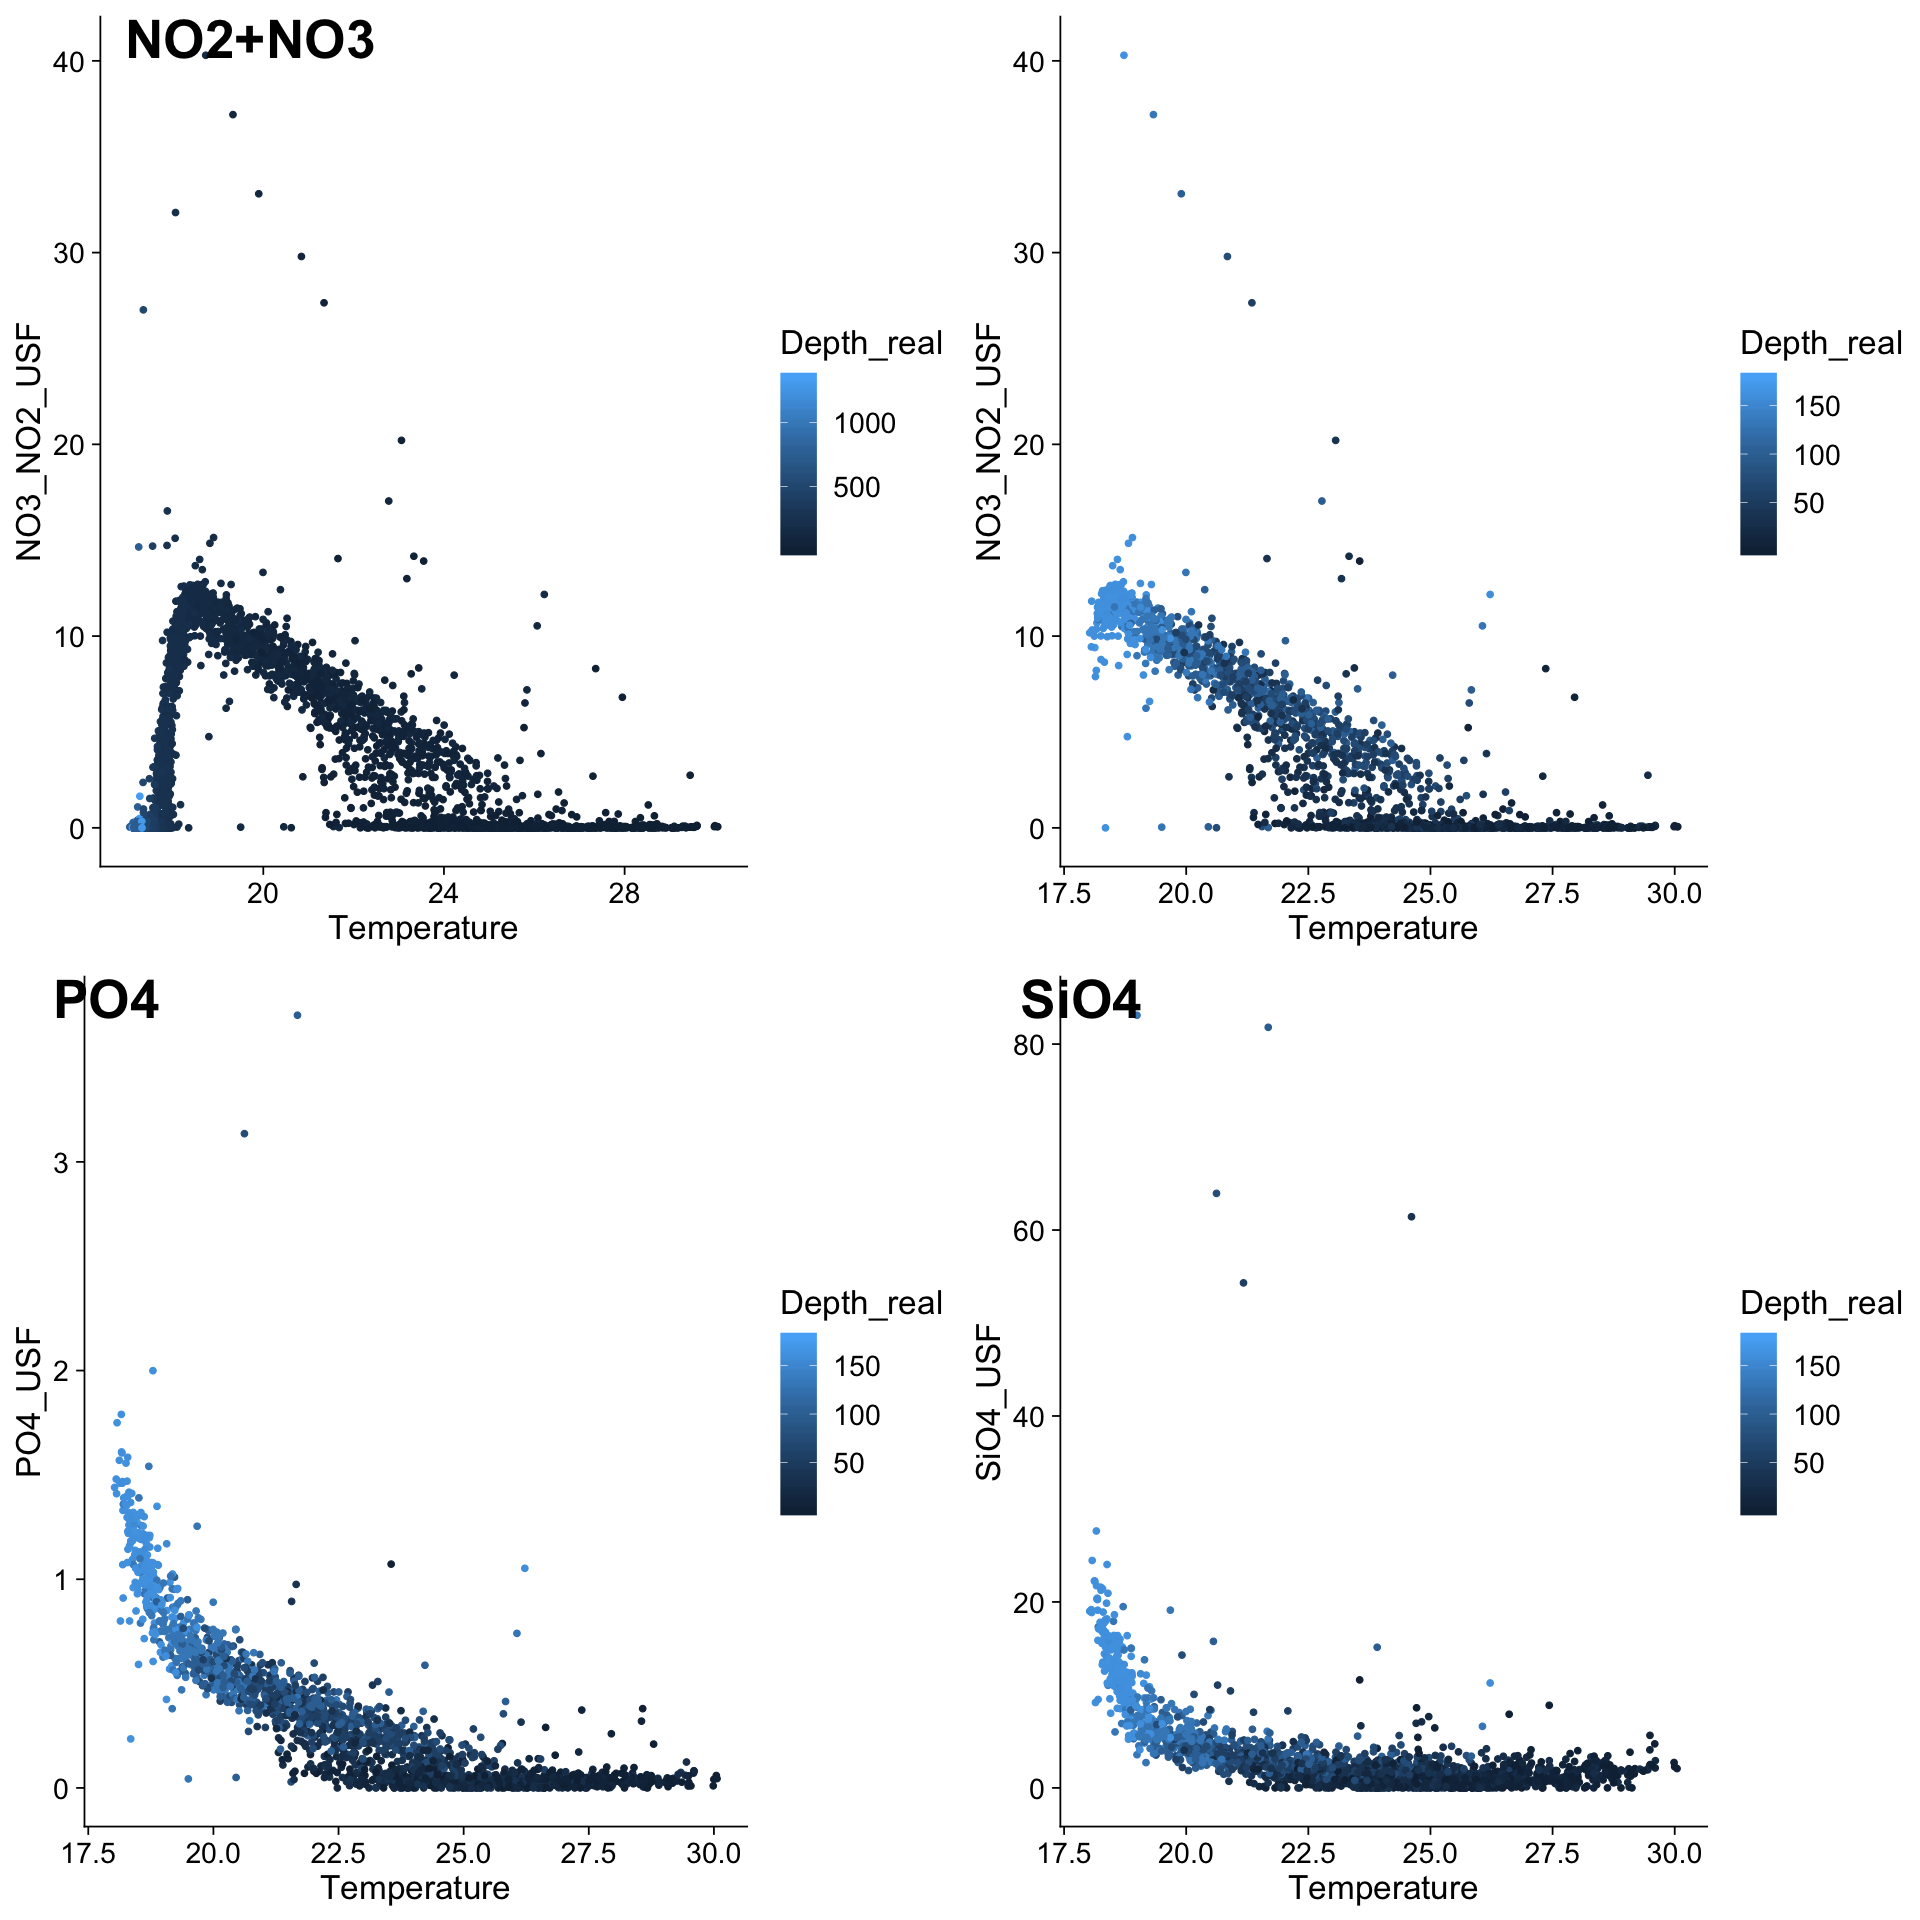

In [24]:
options(repr.plot.width=16, repr.plot.height=16)
plot_grid(TempNutsFull_Plot, TempNutsAbove180_Plot, 
          TempPO4Above180_Plot,TempSiO4Above180_Plot,
          labels = c('NO2+NO3', '','PO4','SiO4'), label_size = 32)

## OK, next check productivity

### get Chl & POC over depth

In [25]:
niskdat_df$O2_umol_kg <- as.numeric(niskdat_df$O2_umol_kg)
niskdat_df$POC_ug_kg <- as.numeric(niskdat_df$POC_ug_kg)
niskdat_df$PON_ug_kg <- as.numeric(niskdat_df$PON_ug_kg)
niskdat_df$PN_ug_L <- as.numeric(niskdat_df$PN_ug_L)

niskdat_df$C_N_particulate <- as.numeric(niskdat_df$C_N_particulate)
niskdat_df$PIP <- as.numeric(niskdat_df$PIP)
niskdat_df$TPP <- as.numeric(niskdat_df$TPP)
niskdat_df$DOC <- as.numeric(niskdat_df$DOC)
niskdat_df$PrimaryProductivity <- as.numeric(niskdat_df$PrimaryProductivity)
niskdat_df$Chlorophyll <- as.numeric(niskdat_df$Chlorophyll)
niskdat_df$Phaeopigments <- as.numeric(niskdat_df$Phaeopigments)


In [26]:
TempNuts2 <- data.frame(date = niskdat_df$date, Depth_real = niskdat_df$Depth_real, Temperature = niskdat_df$Temperature, 
                       O2_umol_kg = niskdat_df$O2_umol_kg, 
                       POC_ug_kg = niskdat_df$POC_ug_kg, 
                       PON_ug_kg = niskdat_df$PON_ug_kg, 
                       PN_ug_L = niskdat_df$PN_ug_L,
                       PO4_USF = niskdat_df$PO4_USF,
                       C_N_particulate = niskdat_df$C_N_particulate, 
                       PIP = niskdat_df$PIP, 
                       TPP = niskdat_df$TPP, 
                       DOC = niskdat_df$DOC,
                       PrimaryProductivity = niskdat_df$PrimaryProductivity,
                       Chlorophyll = niskdat_df$Chlorophyll, 
                       Phaeopigments = niskdat_df$Phaeopigments
                      )

In [27]:
TempNuts2Above250 <- TempNuts2[TempNuts2$Depth_real<180,]

In [28]:
ChlvsPOCAbove180_Plot <- ggplot(data=TempNuts2Above250, aes(x=POC_ug_kg,y=Chlorophyll, col=Depth_real)) + geom_point() + theme_cowplot(20) + ylim(0,1.5)

In [29]:
CNvsDepth_Plot <- ggplot(data=TempNuts2Above250, aes(x=C_N_particulate,y=Depth_real)) + geom_point() + theme_cowplot(20)

In [30]:
TPP_CHL_Plot <- ggplot(data=TempNuts2Above250, aes(x=TPP,y=Chlorophyll, col=Depth_real)) + geom_point() + theme_cowplot(20)

In [31]:
#ChlvsPOCAbove180_Plot
#CNvsDepth_Plot
#TPP_CHL_Plot

# Get other Chlorophyll and mixing measures!

In [32]:
# where to get Fluoresence & HPLC data from?
PinckHPLC_1 <- read.csv("IntegratedValues_PINCKNEY.csv",sep=';',dec=',')

In [33]:
#PinckHPLC_1

In [34]:
PinckHPLC_IN <- read.csv("PINTDF_integratedChlorophyll.csv")

In [35]:
PinckHPLC_IN$date <- as.Date(PinckHPLC_IN$Date)

In [36]:
PinckHPLC_INTchla <- PinckHPLC_IN[PinckHPLC_IN$spec == 'Tchla',]

In [37]:
head(PinckHPLC_INTchla)

,X,Date,val,spec,date
,<int>,<fct>,<dbl>,<fct>,<date>
1,1,1995-12-14,13.54,Tchla,1995-12-14
2,2,1996-01-13,44.21,Tchla,1996-01-13
3,3,1996-02-14,28.77,Tchla,1996-02-14
4,4,1996-03-13,21.26,Tchla,1996-03-13
5,5,1996-04-17,171.92,Tchla,1996-04-17
6,6,1996-05-10,44.24,Tchla,1996-05-10


In [263]:
HPLC_INT = data.frame('date' = PinckHPLC_INTchla$date, 'HPLC_Tchla' = PinckHPLC_INTchla$val)

In [264]:
head(HPLC_INT)

,date,HPLC_Tchla
,<date>,<dbl>
1,1995-12-14,13.54
2,1996-01-13,44.21
3,1996-02-14,28.77
4,1996-03-13,21.26
5,1996-04-17,171.92
6,1996-05-10,44.24


In [40]:
TempNuts2Above100 <- TempNuts2[TempNuts2$Depth_real<105,]

In [392]:
integrate <- function(DF, spec="trap"){
    if(spec=="trap"){
        DF_1 <- DF %>%
            group_by(date, depth) %>%
            summarise(value = mean(value))
        print(tail(DF_1,n=11))
        DF_int <- DF_1 %>%
            group_by(date) %>%
            do(data.frame(value_int = with(.,integrateTrapezoid(x=depth, y=value))))
    
        }else if(spec=='2'){
            DF_1 <- DF %>%
            group_by(date,depth) %>%
            summarise(value = mean(value))
        
        DFtest <- DF_1 %>%
            group_by(date) %>%
            filter(sum(!is.na(value))>2) %>%
            do(data.frame(middepth = as.numeric(stats::filter(.$depth, c(0.5,0.5))), midval = as.numeric(stats::filter(.$value, c(0.5,0.5)))))
        DFtest <- na.omit(DFtest)
        print(tail(DF_1,n=10))
        DF_int <- DFtest %>%
        group_by(date) %>%
        do(data.frame(value_int = with(.,integrateTrapezoid(x=middepth, y=midval))))
        print(head(DF_int))
        
    }
    return(DF_int)
}

In [393]:
prep_df_ntrplt <- function(dataframe){
    colnames(dataframe) <- c("date", "depth","value")
    return(dataframe)
}

In [265]:
ChlaDDV <- data.frame(date = niskdat_df$date, Depth_target = niskdat_df$Depth_target ,Chlorophyll = niskdat_df$Chlorophyll)

In [266]:
ChlaDDV <- ChlaDDV[ChlaDDV$Depth_target < 105,]

In [267]:
ChlaDDVx <- prep_df_ntrplt(ChlaDDV)
head(ChlaDDVx)

,date,depth,value
,<date>,<dbl>,<dbl>
1,1995-11-08,1,0.0940762
2,1995-11-08,7,0.0746952
3,1995-11-08,15,0.1000480
4,1995-11-08,25,0.1180140
5,1995-11-08,35,0.1314760
6,1995-11-08,55,0.4180000


In [268]:
ChlaXXX <- integrate(ChlaDDVx)

# A tibble: 11 x 3
# Groups:   date [2]
   date       depth   value
   <date>     <dbl>   <dbl>
 1 2017-01-12    55  0.189 
 2 2017-01-12    75  0.0614
 3 2017-01-12   100  0.0598
 4 NA             7  0.33  
 5 NA            15  0.28  
 6 NA            25  0.56  
 7 NA            35  1.46  
 8 NA            55  1.31  
 9 NA            75 NA     
10 NA           100 NA     
11 NA            NA NA     


In [269]:
#Test1 = merge(HPLC_INT,TempNuts2Above100)

In [270]:
HPLC_INT$date = format(HPLC_INT$date, "%Y-%m")
ChlaXXX$date = format(ChlaXXX$date, "%Y-%m")

In [271]:
Test2 = merge(HPLC_INT,ChlaXXX)

In [272]:
tail(Test2)

,date,HPLC_Tchla,value_int
,<chr>,<dbl>,<dbl>
156,2016-02,44.41,38.68500
157,2016-05,43.14,19.88620
158,2016-06,37.26,12.07000
159,2016-09,31.38,24.70185
160,2016-12,32.23,24.85764
161,2017-01,51.42,40.31706


FLChla = milligrams/meter^3 (mg/m^3)

HPLCChla = mg/m^3

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


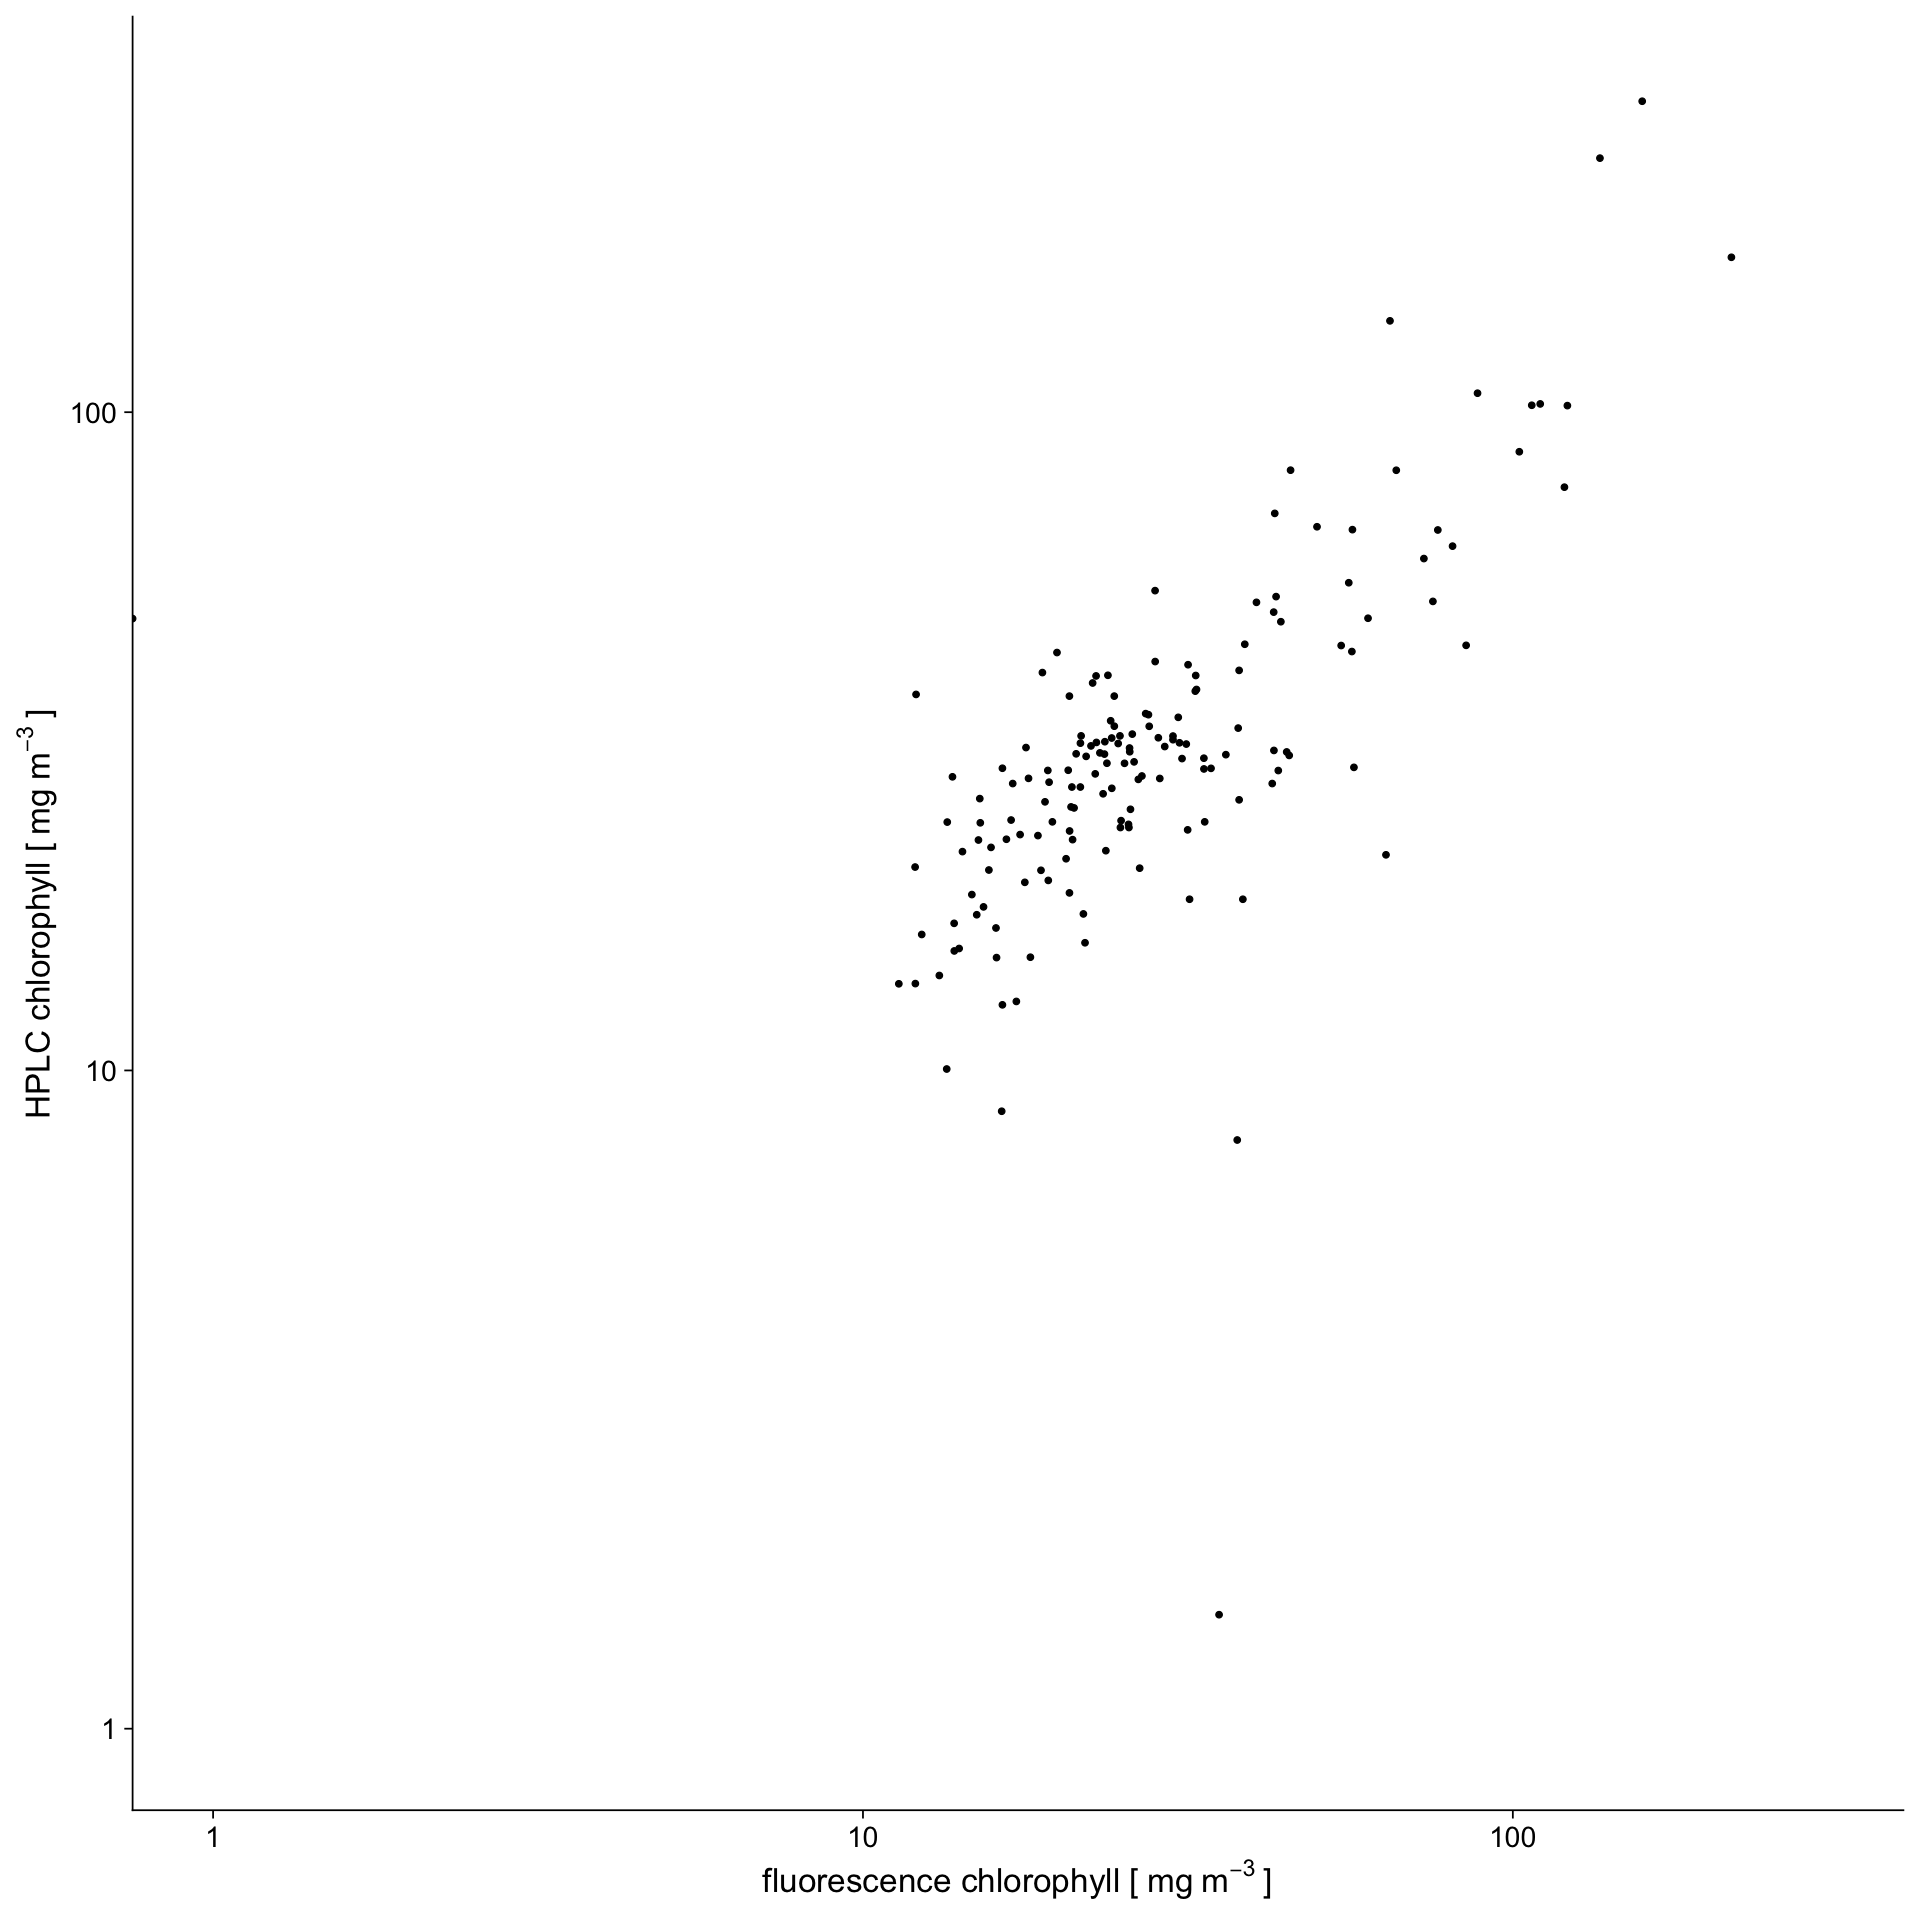

In [516]:
#CHlaHPLCFluorCOMP <- 
ggplot(data=Test2, aes(x=value_int,y=HPLC_Tchla)) + geom_point() + theme_cowplot(20) + ylab(bquote('HPLC chlorophyll [' ~ mg ~ m^{-3} ~']')) + xlab(bquote("fluorescence chlorophyll [" ~ mg ~ m^{-3} ~"]")) +scale_x_log10(limits=c(1,300)) +scale_y_log10(limits=c(1,300)) #+ ylim(0,300)+xlim(0,300)

In [213]:
str(Test2)

'data.frame':	161 obs. of  3 variables:
 $ date      : chr  "1995-12" "1996-01" "1996-02" "1996-03" ...
 $ HPLC_Tchla: num  13.5 44.2 28.8 21.3 171.9 ...
 $ Chla      : num  11.4 54.4 34.3 63.8 216.9 ...


# NOW do the same for POC comparisons! 
1. interpolate vals

In [214]:
#niskdat_df$date

In [215]:
POCDDV <- data.frame(date = niskdat_df$date, Depth_target = niskdat_df$Depth_target , POC = niskdat_df$POC_ug_kg)

POCDDVx <- POCDDV[POCDDV$Depth_target < 105,]

POCDDVx2 <- prep_df_ntrplt(POCDDVx)
head(POCDDVx2)

,date,depth,value
,<date>,<dbl>,<dbl>
1,1995-11-08,1,NA
2,1995-11-08,7,NA
3,1995-11-08,15,NA
4,1995-11-08,25,NA
5,1995-11-08,35,NA
6,1995-11-08,55,NA


In [216]:
POCXXX <- integrate(POCDDVx2)

# A tibble: 11 x 3
# Groups:   date [2]
   date       depth value
   <date>     <dbl> <dbl>
 1 2017-01-12    55  79.0
 2 2017-01-12    75  59.6
 3 2017-01-12   100  58.7
 4 NA             7  NA  
 5 NA            15  NA  
 6 NA            25  NA  
 7 NA            35  NA  
 8 NA            55  NA  
 9 NA            75  NA  
10 NA           100  NA  
11 NA            NA  NA  


In [218]:
POCXXX$date = format(POCXXX$date, "%Y-%m")

In [235]:
names(ChlaXXX) <- c('date','Chla')
chlaPOC <- merge(POCXXX,ChlaXXX)

In [247]:
head(chlaPOC)

,date,value_int,Chla
,<chr>,<dbl>,<dbl>
1,1995-11,NA,17.73672
2,1995-12,4792.905,11.35500
3,1996-01,7949.368,54.43217
4,1996-02,10991.448,34.32102
5,1996-03,16678.812,63.79741
6,1996-04,15867.825,216.92748


In [238]:
Test3 = merge(HPLC_INT,POCXXX)

In [239]:
bquote("fluorescence chlorophyll [" ~ mg ~ m^{-3} ~"]")

"fluorescence chlorophyll [" ~ mg ~ m^{
    -3
} ~ "]"

In [488]:
CHlaHPLC_POC_COMP <- 
ggplot(data=Test3, aes(x=value_int,y=HPLC_Tchla)) + 
geom_point() + theme_cowplot(20)+scale_y_log10() + scale_x_log10() +
ylab(bquote('HPLC chlorophyll [' ~ mg ~ m^{-3} ~']')) + xlab(bquote('POC ['~ µg ~ l^{-1} ~ ']')) #+ ylim(0,300)#+xlim(0,300)

In [489]:
cor.test(Test3$value_int,Test3$HPLC_Tchla)


	Pearson's product-moment correlation

data:  Test3$value_int and Test3$HPLC_Tchla
t = 5.778, df = 135, p-value = 4.981e-08
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2999577 0.5703918
sample estimates:
      cor 
0.4452726 


In [490]:
FluorPOC_COMP <- 
ggplot(data=chlaPOC, aes(x=value_int,y=Chla)) + 
geom_point() + theme_cowplot(20) + scale_y_log10() + scale_x_log10() +
ylab(bquote("fluorescence chlorophyll [" ~ mg ~ m^{-3} ~"]")) + xlab(bquote('POC ['~ µg ~ l^{-1} ~ ']')) #+ ylim(0,300)#+xlim(0,300)

In [491]:
cor.test(chlaPOC$value_int,chlaPOC$Chla)


	Pearson's product-moment correlation

data:  chlaPOC$value_int and chlaPOC$Chla
t = 10.75, df = 189, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5194445 0.6970137
sample estimates:
      cor 
0.6159941 


# INTEGRATE other measuerments of productivity apart from POC!

In [492]:
PONDDV <- data.frame(date = niskdat_df$date, Depth_target = niskdat_df$Depth_target , POC = niskdat_df$PON_ug_kg)

PONDDVx <- PONDDV[PONDDV$Depth_target < 105,]

PONDDVx2 <- prep_df_ntrplt(PONDDVx)
head(PONDDVx2)

,date,depth,value
,<date>,<dbl>,<dbl>
1,1995-11-08,1,NA
2,1995-11-08,7,NA
3,1995-11-08,15,NA
4,1995-11-08,25,NA
5,1995-11-08,35,NA
6,1995-11-08,55,NA


In [493]:
PONXXX <- integrate(PONDDVx2)

# A tibble: 11 x 3
# Groups:   date [2]
   date       depth value
   <date>     <dbl> <dbl>
 1 2017-01-12    55 14.8 
 2 2017-01-12    75  9.63
 3 2017-01-12   100  7.99
 4 NA             7 NA   
 5 NA            15 NA   
 6 NA            25 NA   
 7 NA            35 NA   
 8 NA            55 NA   
 9 NA            75 NA   
10 NA           100 NA   
11 NA            NA NA   


In [494]:
PONXXX$date = format(PONXXX$date, "%Y-%m")

In [495]:
names(ChlaXXX) <- c('date','Chla')
chlaPON <- merge(PONXXX,ChlaXXX)

In [496]:
HPLCPON <- merge(HPLC_INT,PONXXX)

In [497]:
str(HPLC_INT)

'data.frame':	162 obs. of  2 variables:
 $ date      : chr  "1995-12" "1996-01" "1996-02" "1996-03" ...
 $ HPLC_Tchla: num  13.5 44.2 28.8 21.3 171.9 ...


In [498]:
# PrimaryProductivity

In [499]:
PriProDDV <- data.frame(date = niskdat_df$date, Depth_target = niskdat_df$Depth_target , POC = niskdat_df$PrimaryProductivity)

PriProDDVx <- PriProDDV[PriProDDV$Depth_target < 105,]

PriProDDVx2 <- prep_df_ntrplt(PriProDDVx)
head(PriProDDVx2)

,date,depth,value
,<date>,<dbl>,<dbl>
1,1995-11-08,1,NA
2,1995-11-08,7,NA
3,1995-11-08,15,NA
4,1995-11-08,25,NA
5,1995-11-08,35,NA
6,1995-11-08,55,NA


In [500]:
PriProXXX <- integrate(PriProDDVx2)

# A tibble: 11 x 3
# Groups:   date [2]
   date       depth  value
   <date>     <dbl>  <dbl>
 1 2017-01-12    55  0    
 2 2017-01-12    75 NA    
 3 2017-01-12   100 NA    
 4 NA             7  2.24 
 5 NA            15  1.95 
 6 NA            25  2.86 
 7 NA            35  2.16 
 8 NA            55  0.484
 9 NA            75 NA    
10 NA           100 NA    
11 NA            NA NA    


In [501]:
PriProXXX$date = format(PriProXXX$date, "%Y-%m")

In [502]:
#names(ChlaXXX) <- c('date','Chla')
chlaPriPro <- merge(PriProXXX,ChlaXXX)

In [503]:
HPLCPriPro <- merge(HPLC_INT,PriProXXX)

In [504]:
#head(HPLCPON$date)
#head(HPLC_INT$date)
#head(format(PONXXX$date, "%Y-%m"))
#HPLC_INT[! HPLC_INT$date %in% HPLCPON$date,]

#PONXXX[! HPLC_INT$date %in% HPLCPON$date,]

In [505]:
CHlaHPLC_PON_COMP <- 
ggplot(data=HPLCPON, aes(x=value_int,y=HPLC_Tchla)) + 
geom_point() + theme_cowplot(20)+ scale_y_log10() +scale_x_log10() +
ylab(bquote('HPLC chlorophyll [' ~ mg ~ m^{-3} ~']')) + xlab(bquote('PON ['~ µg ~ l^{-1} ~ ']')) #+ ylim(0,300)#+xlim(0,300)

In [506]:
FluorPON_COMP <- 
ggplot(data=chlaPON, aes(x=value_int,y=Chla)) + 
geom_point() + theme_cowplot(20) +  scale_y_log10() +scale_x_log10() +
ylab(bquote("fluorescence chlorophyll [" ~ mg ~ m^{-3} ~"]")) + xlab(bquote('PON ['~ µg ~ l^{-1} ~ ']')) #+ ylim(0,300)#+xlim(0,300)

In [507]:
CHlaHPLC_PriPro_COMP <- 
ggplot(data=HPLCPriPro, aes(x=value_int,y=HPLC_Tchla)) + 
geom_point() + theme_cowplot(20)+ scale_y_log10() +scale_x_log10() +
ylab(bquote('HPLC chlorophyll [' ~ mg ~ m^{-3} ~']')) + xlab(bquote('PriPro ['~ µg ~ l^{-1} ~ ']')) #+ ylim(0,300)#+xlim(0,300)

In [508]:
FluorPriPro_COMP <- 
ggplot(data=chlaPriPro, aes(x=value_int,y=Chla)) + 
geom_point() + theme_cowplot(20) +  scale_y_log10() +scale_x_log10() +
ylab(bquote("fluorescence chlorophyll [" ~ mg ~ m^{-3} ~"]")) + xlab(bquote('PriPro ['~ µg ~ l^{-1} ~ ']')) #+ ylim(0,300)#+xlim(0,300)

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message in plot_grid(CHlaHPLC_POC_COMP, CHlaHPLC_PriPro_COMP, FluorPOC_COMP, :
“Argument 'cols' is deprecated. Use 'ncol' instead.”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 24 rows containing missing values (geom_point).”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 57 rows containing missing values (geom_point).”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 40 rows containing missing values (geom_point).”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in contin

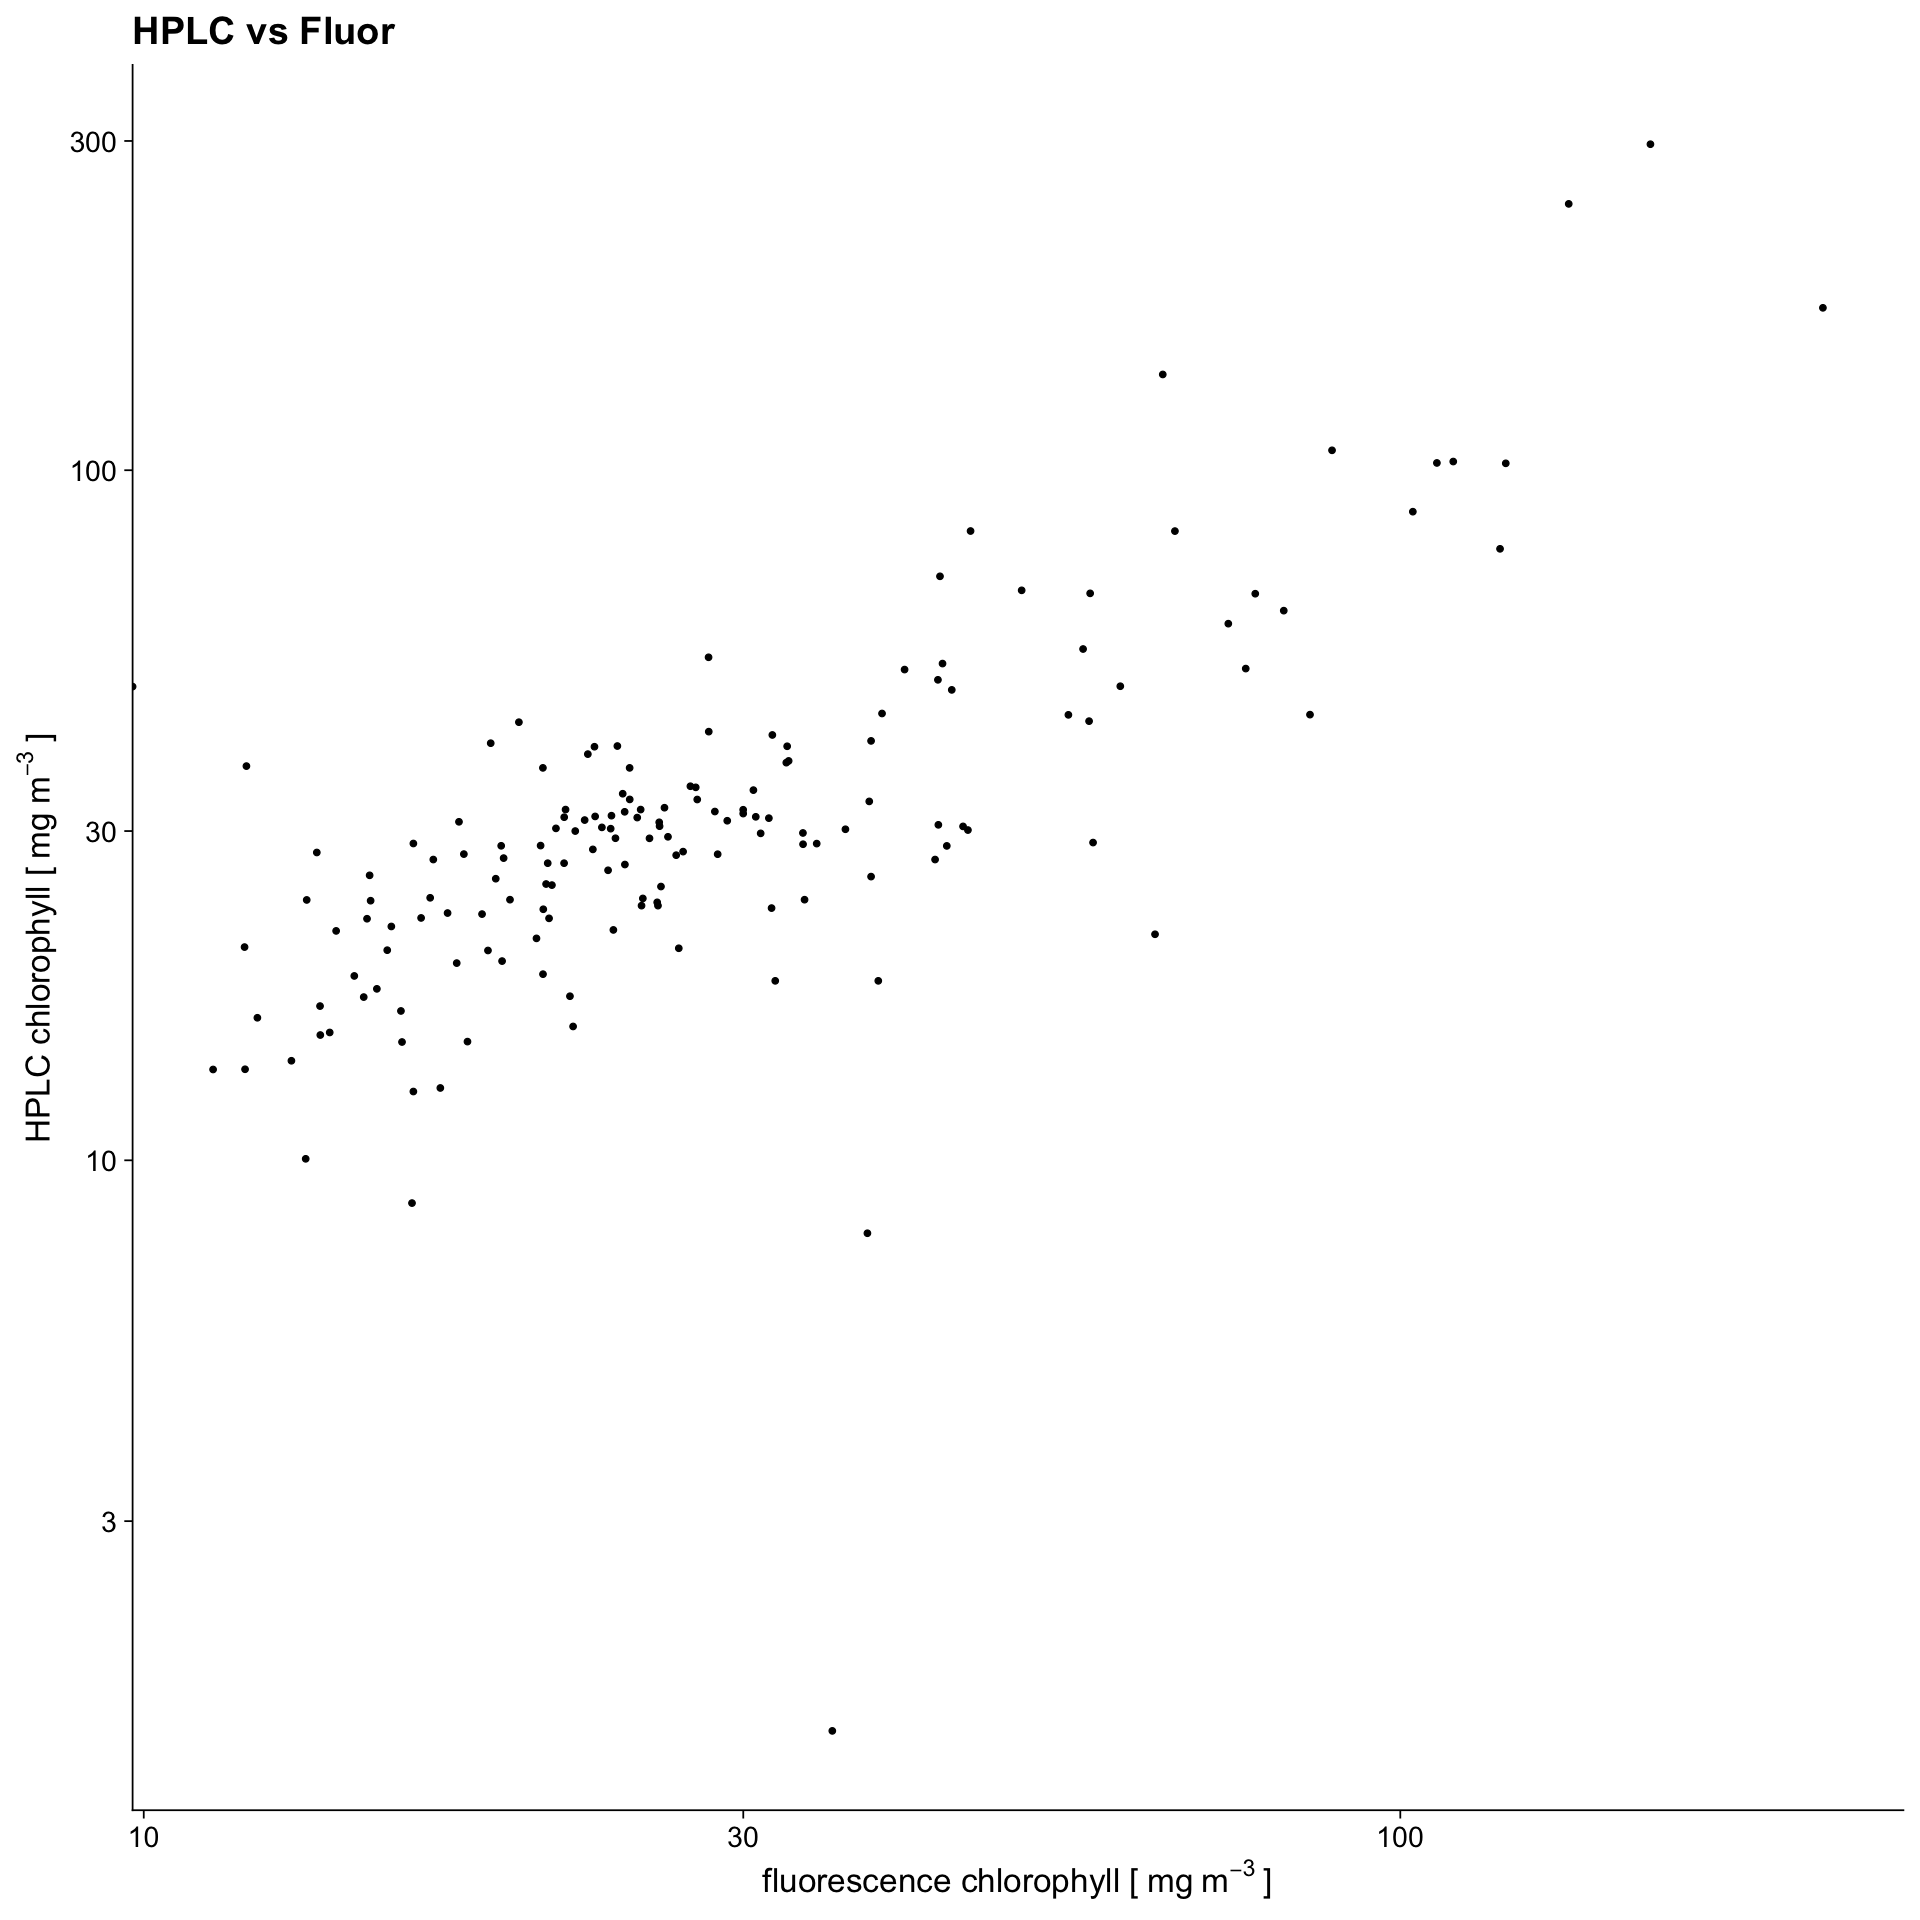

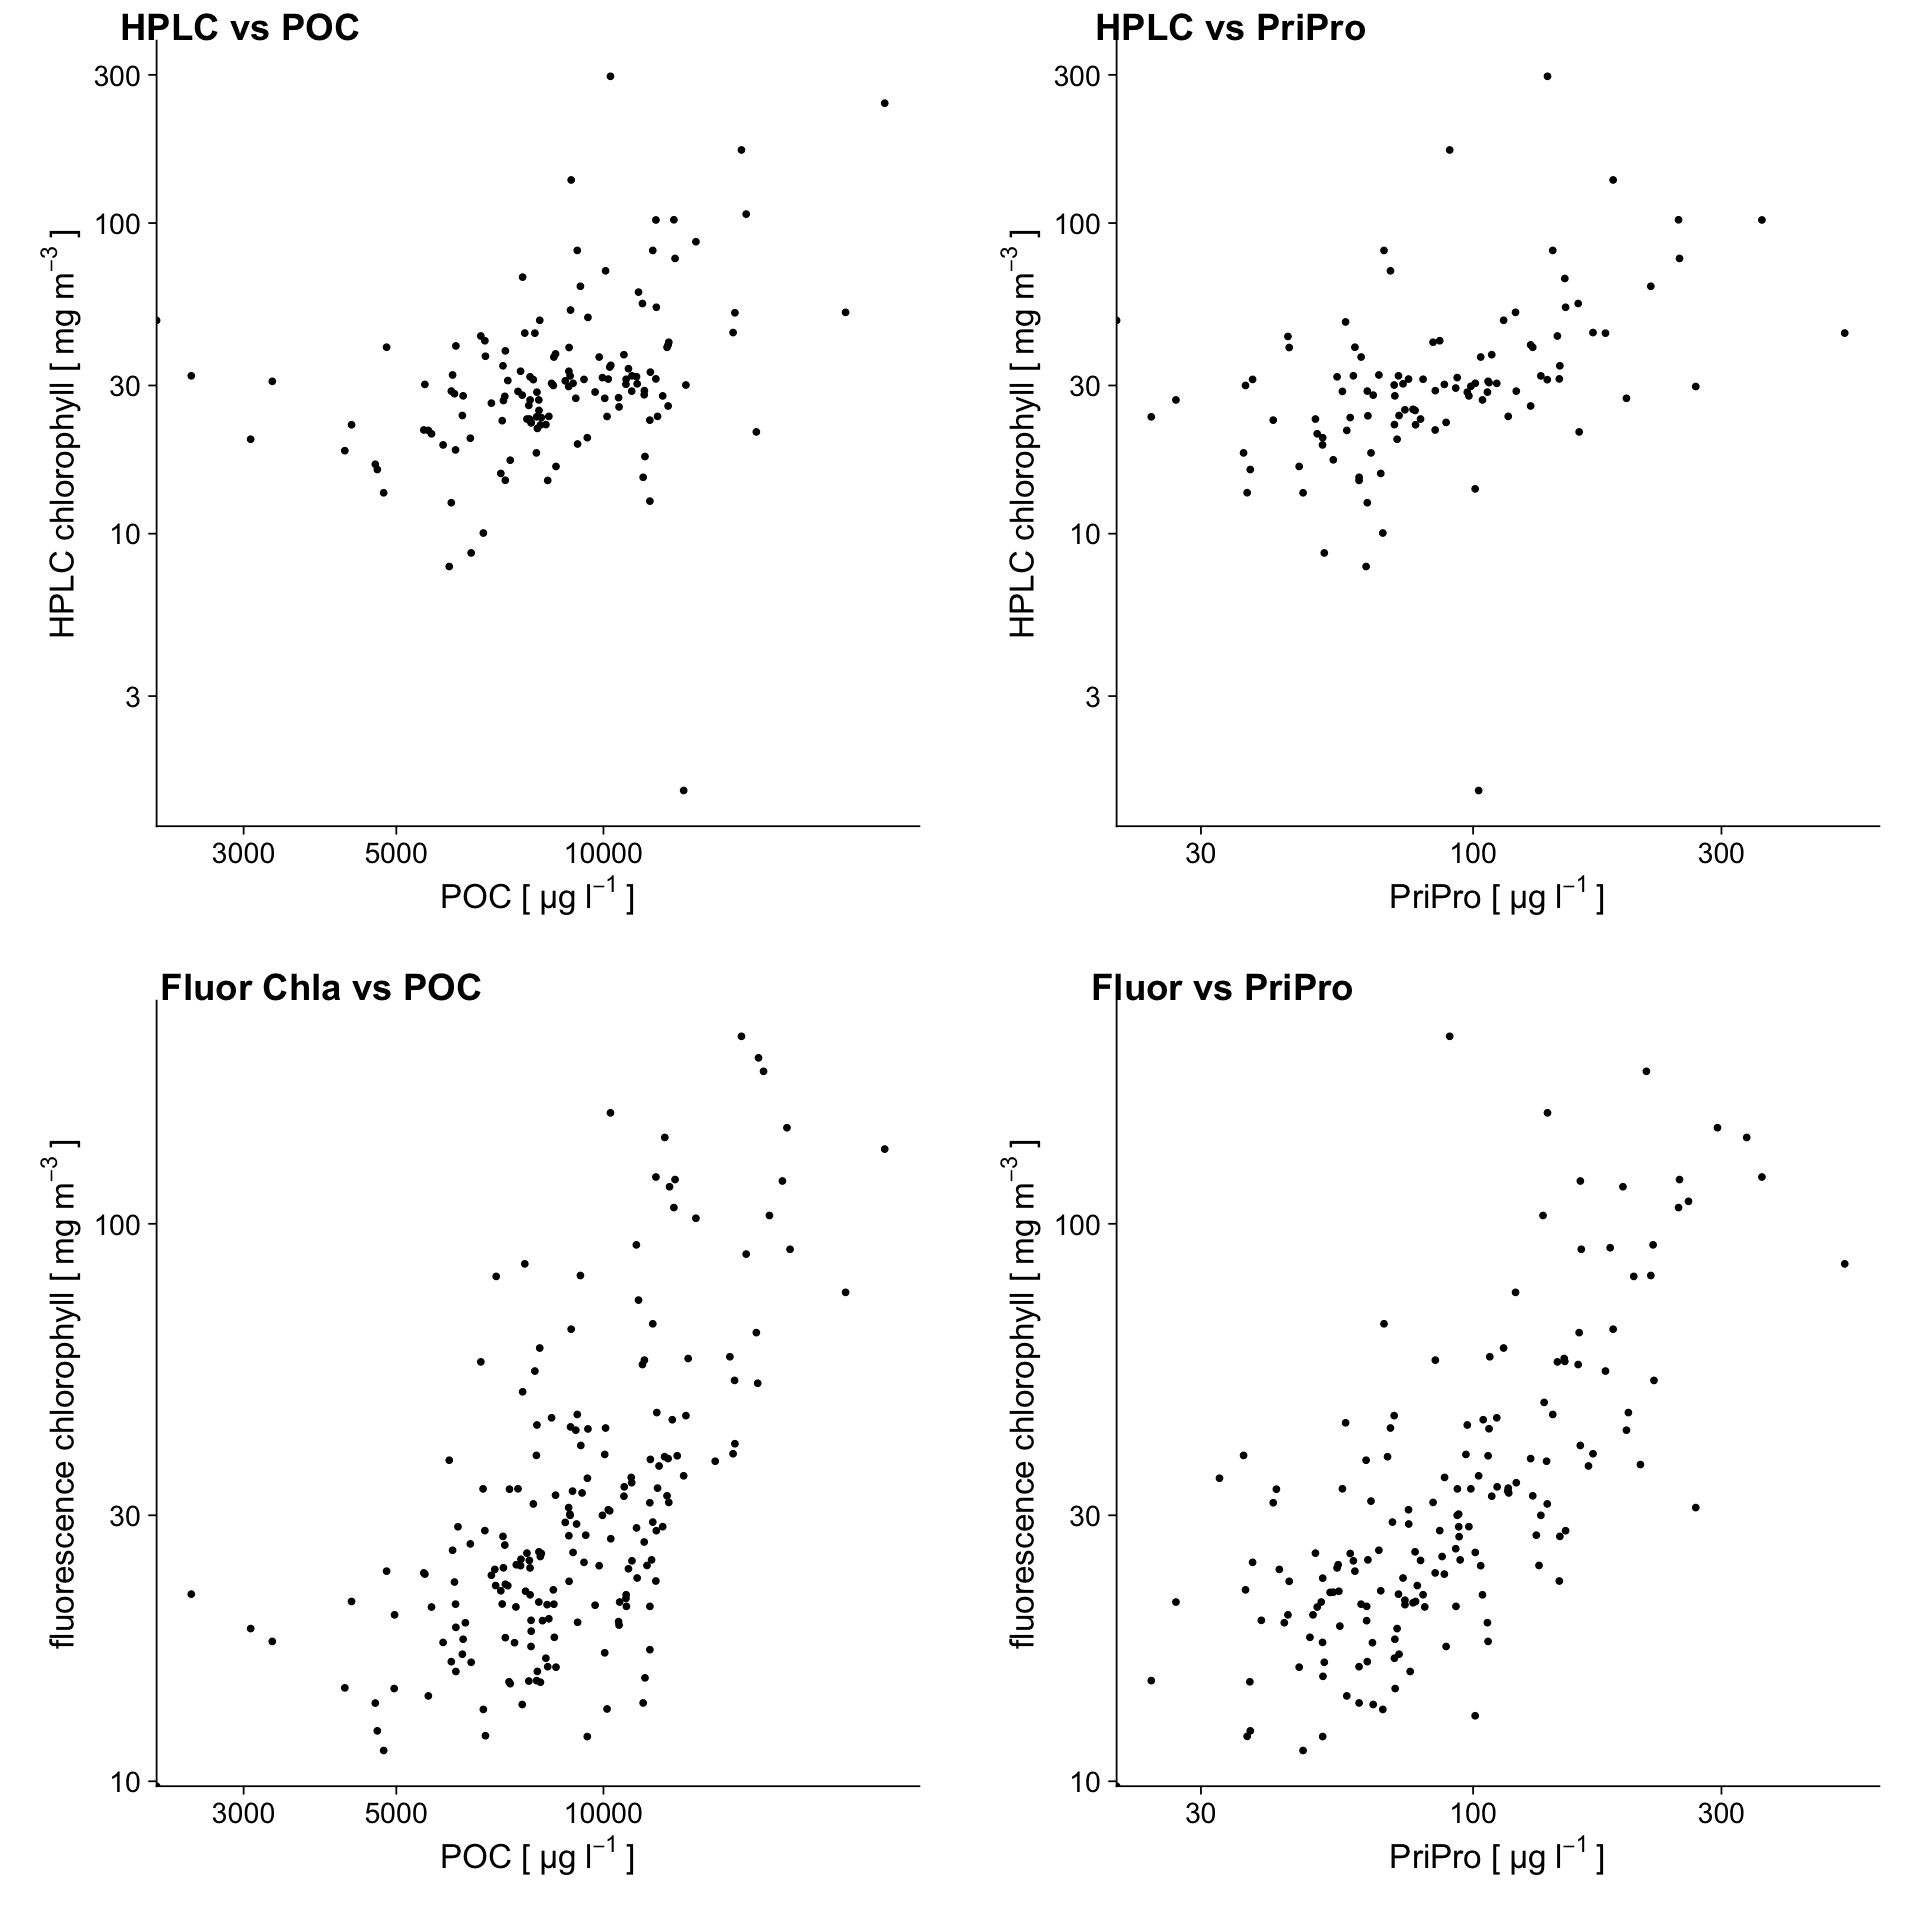

In [512]:
CHlaHPLCFluorCOMP + ggtitle('HPLC vs Fluor')
plot_grid(CHlaHPLC_POC_COMP,CHlaHPLC_PriPro_COMP,
          FluorPOC_COMP, FluorPriPro_COMP,
          labels = c('HPLC vs POC','HPLC vs PriPro','Fluor Chla vs POC','Fluor vs PriPro'), cols=2 ,label_size = 22, scale=0.95)

# Get:
- MLD2015
- MLD2019
- X21°C Isotherm

In [308]:
# 1. read MLD forcings:
# where to get Fluoresence & HPLC data from?
Upwelling <- read.csv("Data/Upwelling_Final-Feb2018.csv",sep=';',dec=',')

In [309]:
Upwelling$Date <- as.Date(Upwelling$Date,format='%m.%d.%Y')

In [310]:
Upwelling$date = format(Upwelling$Date, "%Y-%m")

In [311]:
head(Upwelling$date)

[1] "1995-11" "1995-12" "1996-01" "1996-02" "1996-03" "1996-04"

In [402]:
MIX = data.frame(date = Upwelling$date, MLD2019 = Upwelling$MLD.I, MLD2015 = Upwelling$MLD.II, X258 = Upwelling$Depth.of.25.8.isopycnal..21degC.)

In [403]:
max(Upwelling$MLD.II, na.rm=T)

[1] 35.159

In [454]:
MLDIvsMLDII <- 
ggplot(data=MIX, aes(x=MLD2015, y=MLD2019)) + 
geom_point() + theme_cowplot(20)+
ylab(bquote('MLD2019 [m]')) + xlab(bquote('MLD2015 [m]')) + ylim(0,50) + xlim(0,50)

In [455]:
X258vsMLDII <- 
ggplot(data=MIX, aes(x=X258, y=MLD2019)) + 
geom_point() + theme_cowplot(20)+
ylab(bquote('MLD2019 [m]')) + xlab(bquote('25.8 isopycnal [m]')) + ylim(0,50) + xlim(0,200)

In [456]:
X258vsMLDI <- 
ggplot(data=MIX, aes(x=X258, y=MLD2015)) + 
geom_point() + theme_cowplot(20)+
ylab(bquote('MLD2015 [m]')) + xlab(bquote('25.8 isopycnal [m]')) + ylim(0,50) + xlim(0,200)

Warning message:
“Removed 14 rows containing missing values (geom_point).”
Warning message:
“Removed 14 rows containing missing values (geom_point).”
Warning message:
“Removed 3 rows containing missing values (geom_point).”


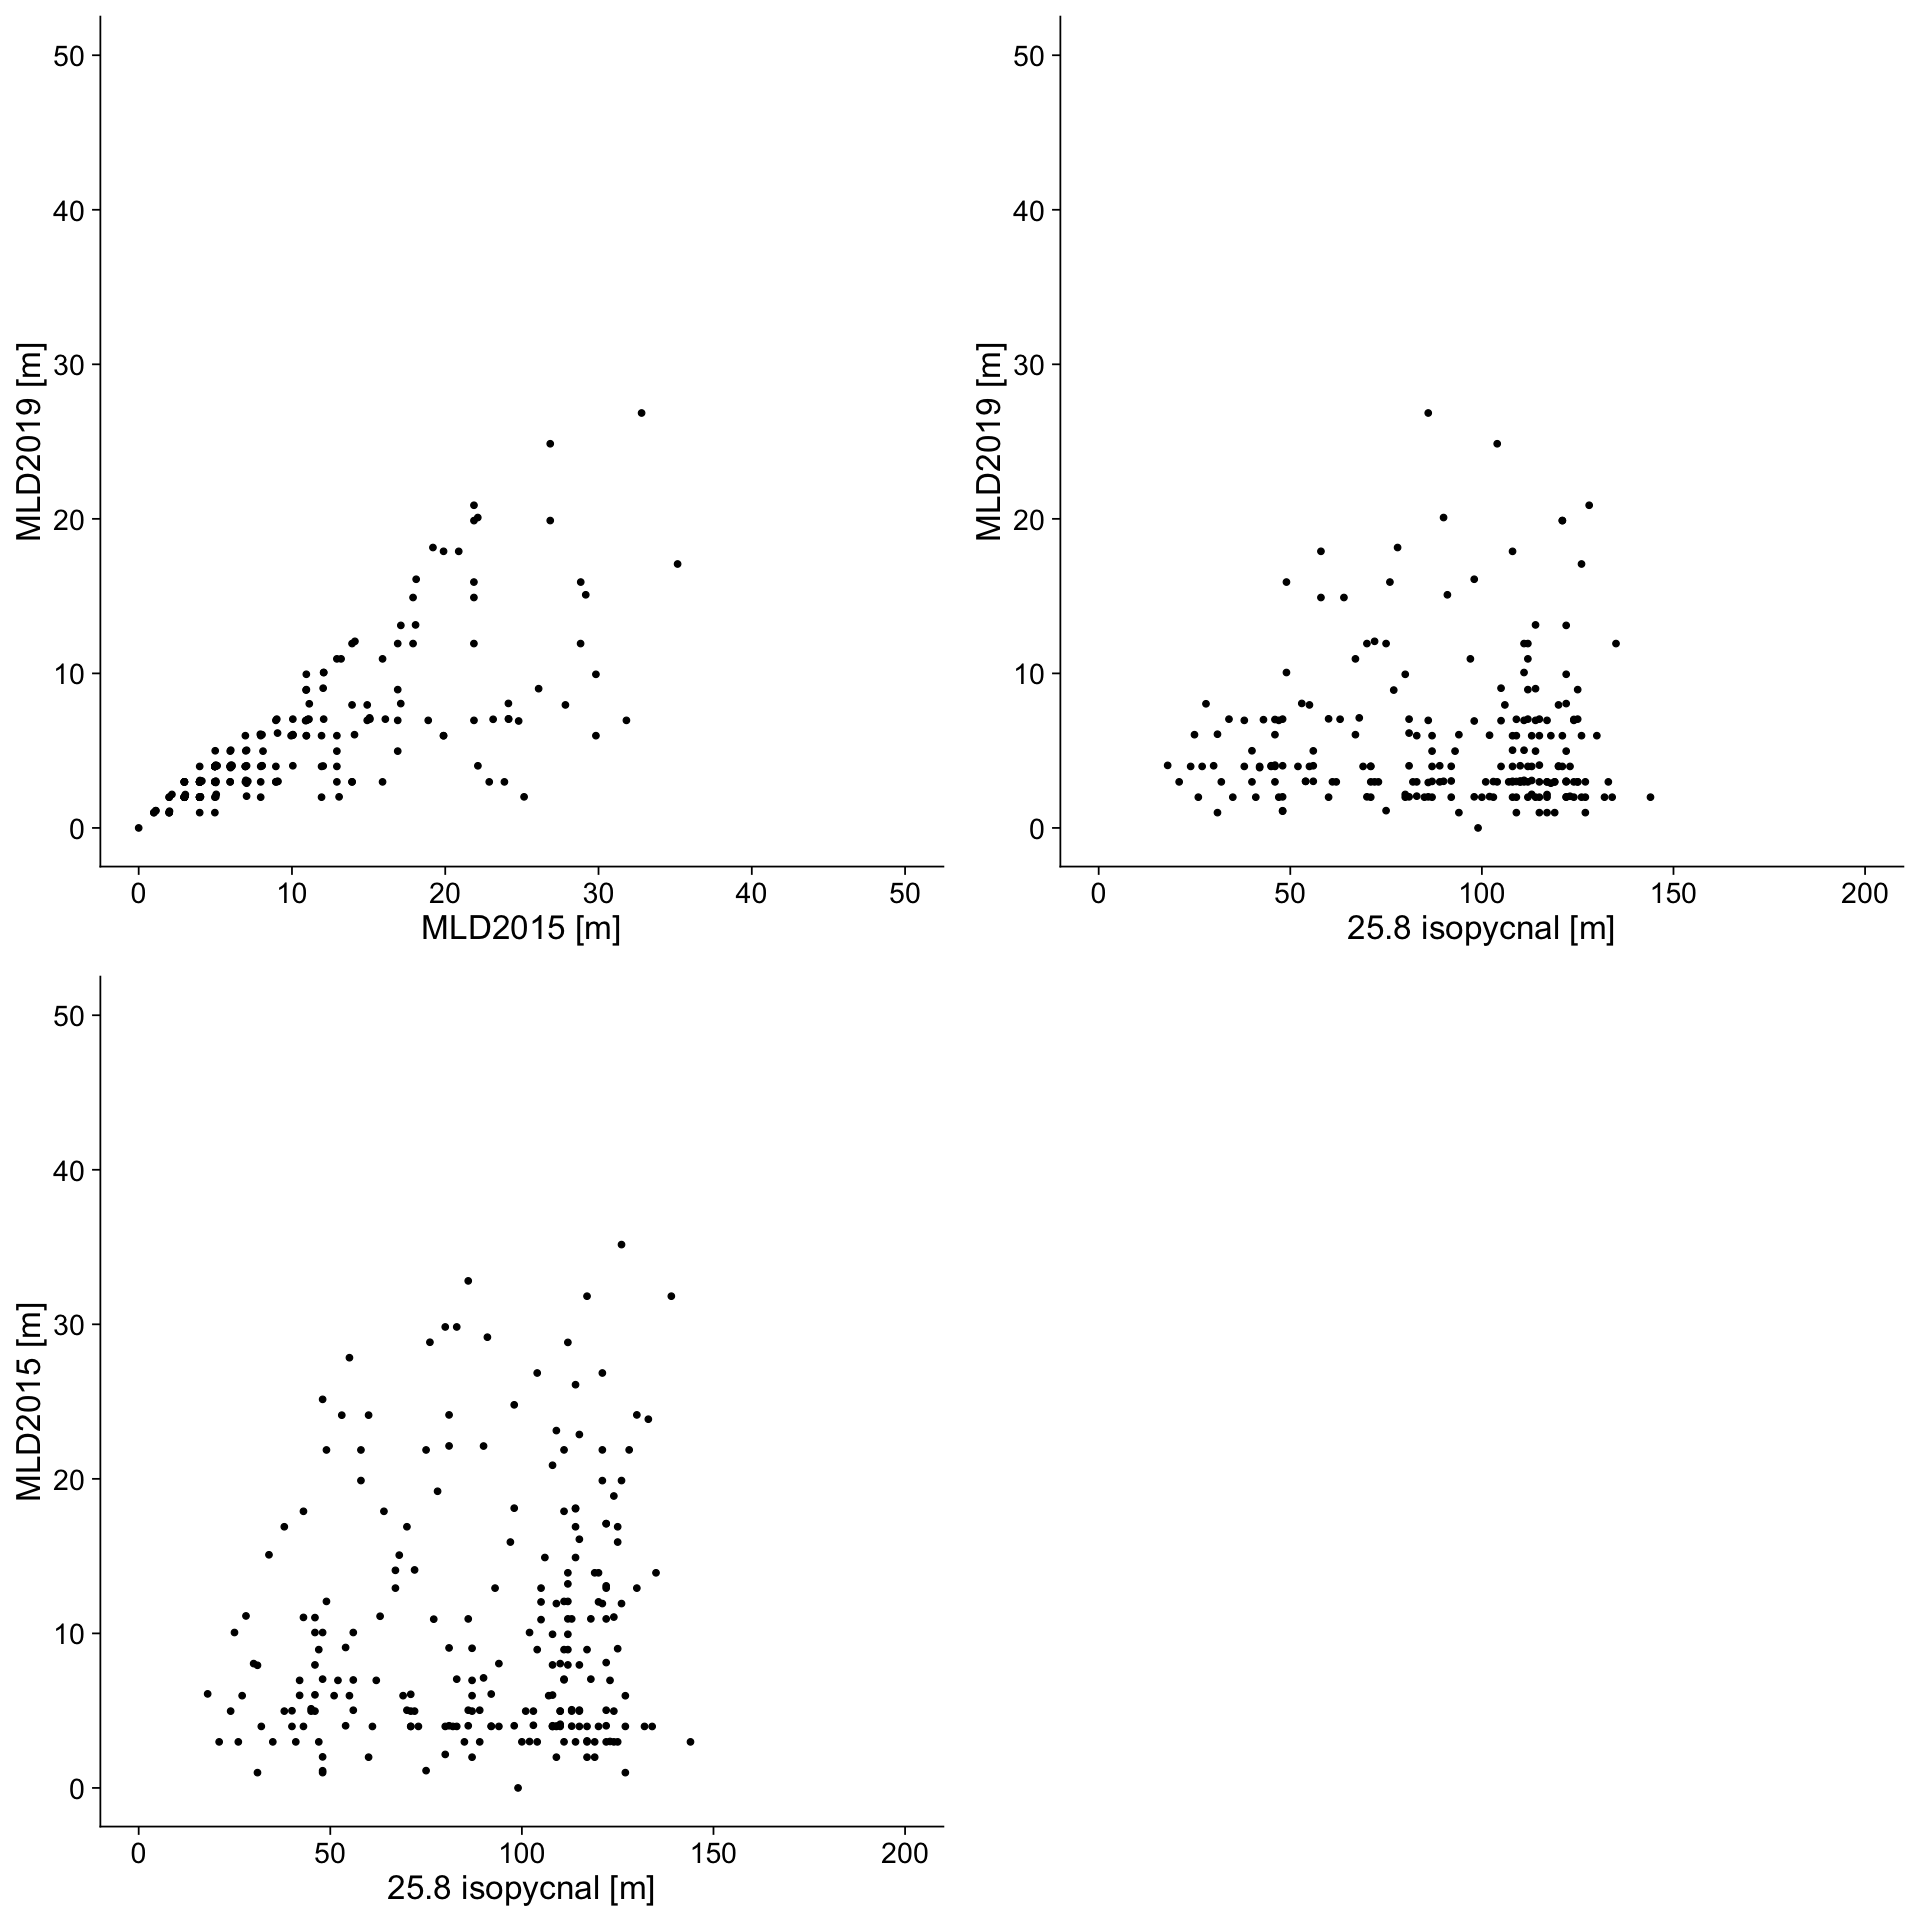

In [457]:
plot_grid(MLDIvsMLDII, X258vsMLDII, X258vsMLDI)

In [406]:
MIX$X258diff <- c(0,-diff(MIX$X258))
MIX$MLDIdiff <- c(0,diff(MIX$MLD2015))
MIX$MLDIIdiff <- c(0,diff(MIX$MLD2019))

In [407]:
HPLCMIX <- merge(HPLC_INT,MIX)

In [467]:
X258vsHPLC <- 
ggplot(data=HPLCMIX, aes(x=X258, y=HPLC_Tchla)) + 
geom_point() + theme_cowplot(20)+scale_y_log10() +
ylab(bquote('HPLC chlorophyll [' ~ mg ~ m^{-3} ~']')) + xlab(bquote('25.8 isopycnal [m]')) #+ ylim(0,50) + xlim(0,200)

In [468]:
# MIX$X258
# -diff(MIX$X258)

In [469]:
X258diffvsHPLC <- 
ggplot(data=HPLCMIX, aes(x=X258diff, y=HPLC_Tchla)) + 
geom_point() + theme_cowplot(20)+ scale_y_log10() +
ylab(bquote('HPLC chlorophyll [' ~ mg ~ m^{-3} ~']')) + xlab(bquote('25.8 isopycnal [m '~ month^{-1} ~']')) #+ ylim(0,50) + xlim(0,200)

In [470]:
MLD2019diffvsHPLC <- 
ggplot(data=HPLCMIX, aes(x=MLDIIdiff, y=HPLC_Tchla)) + 
geom_point() + theme_cowplot(20) +scale_y_log10() +
ylab(bquote('HPLC chlorophyll [' ~ mg ~ m^{-3} ~']')) + xlab(bquote('MLD [m '~ month^{-1} ~']')) #+ ylim(0,50) + xlim(0,200)

In [471]:
MLD2019vsHPLC <- 
ggplot(data=HPLCMIX, aes(x=MLD2019, y=HPLC_Tchla)) + 
geom_point() + theme_cowplot(20) +scale_y_log10() +
ylab(bquote('HPLC chlorophyll [' ~ mg ~ m^{-3} ~']')) + xlab(bquote('MLD [m '~ month^{-1} ~']')) #+ ylim(0,50) + xlim(0,200)

Warning message in plot_grid(X258vsHPLC, X258diffvsHPLC, MLD2019vsHPLC, MLD2019diffvsHPLC, :
“Argument 'cols' is deprecated. Use 'ncol' instead.”
Warning message:
“Removed 2 rows containing missing values (geom_point).”
Warning message:
“Removed 3 rows containing missing values (geom_point).”
Warning message:
“Removed 12 rows containing missing values (geom_point).”
Warning message:
“Removed 13 rows containing missing values (geom_point).”


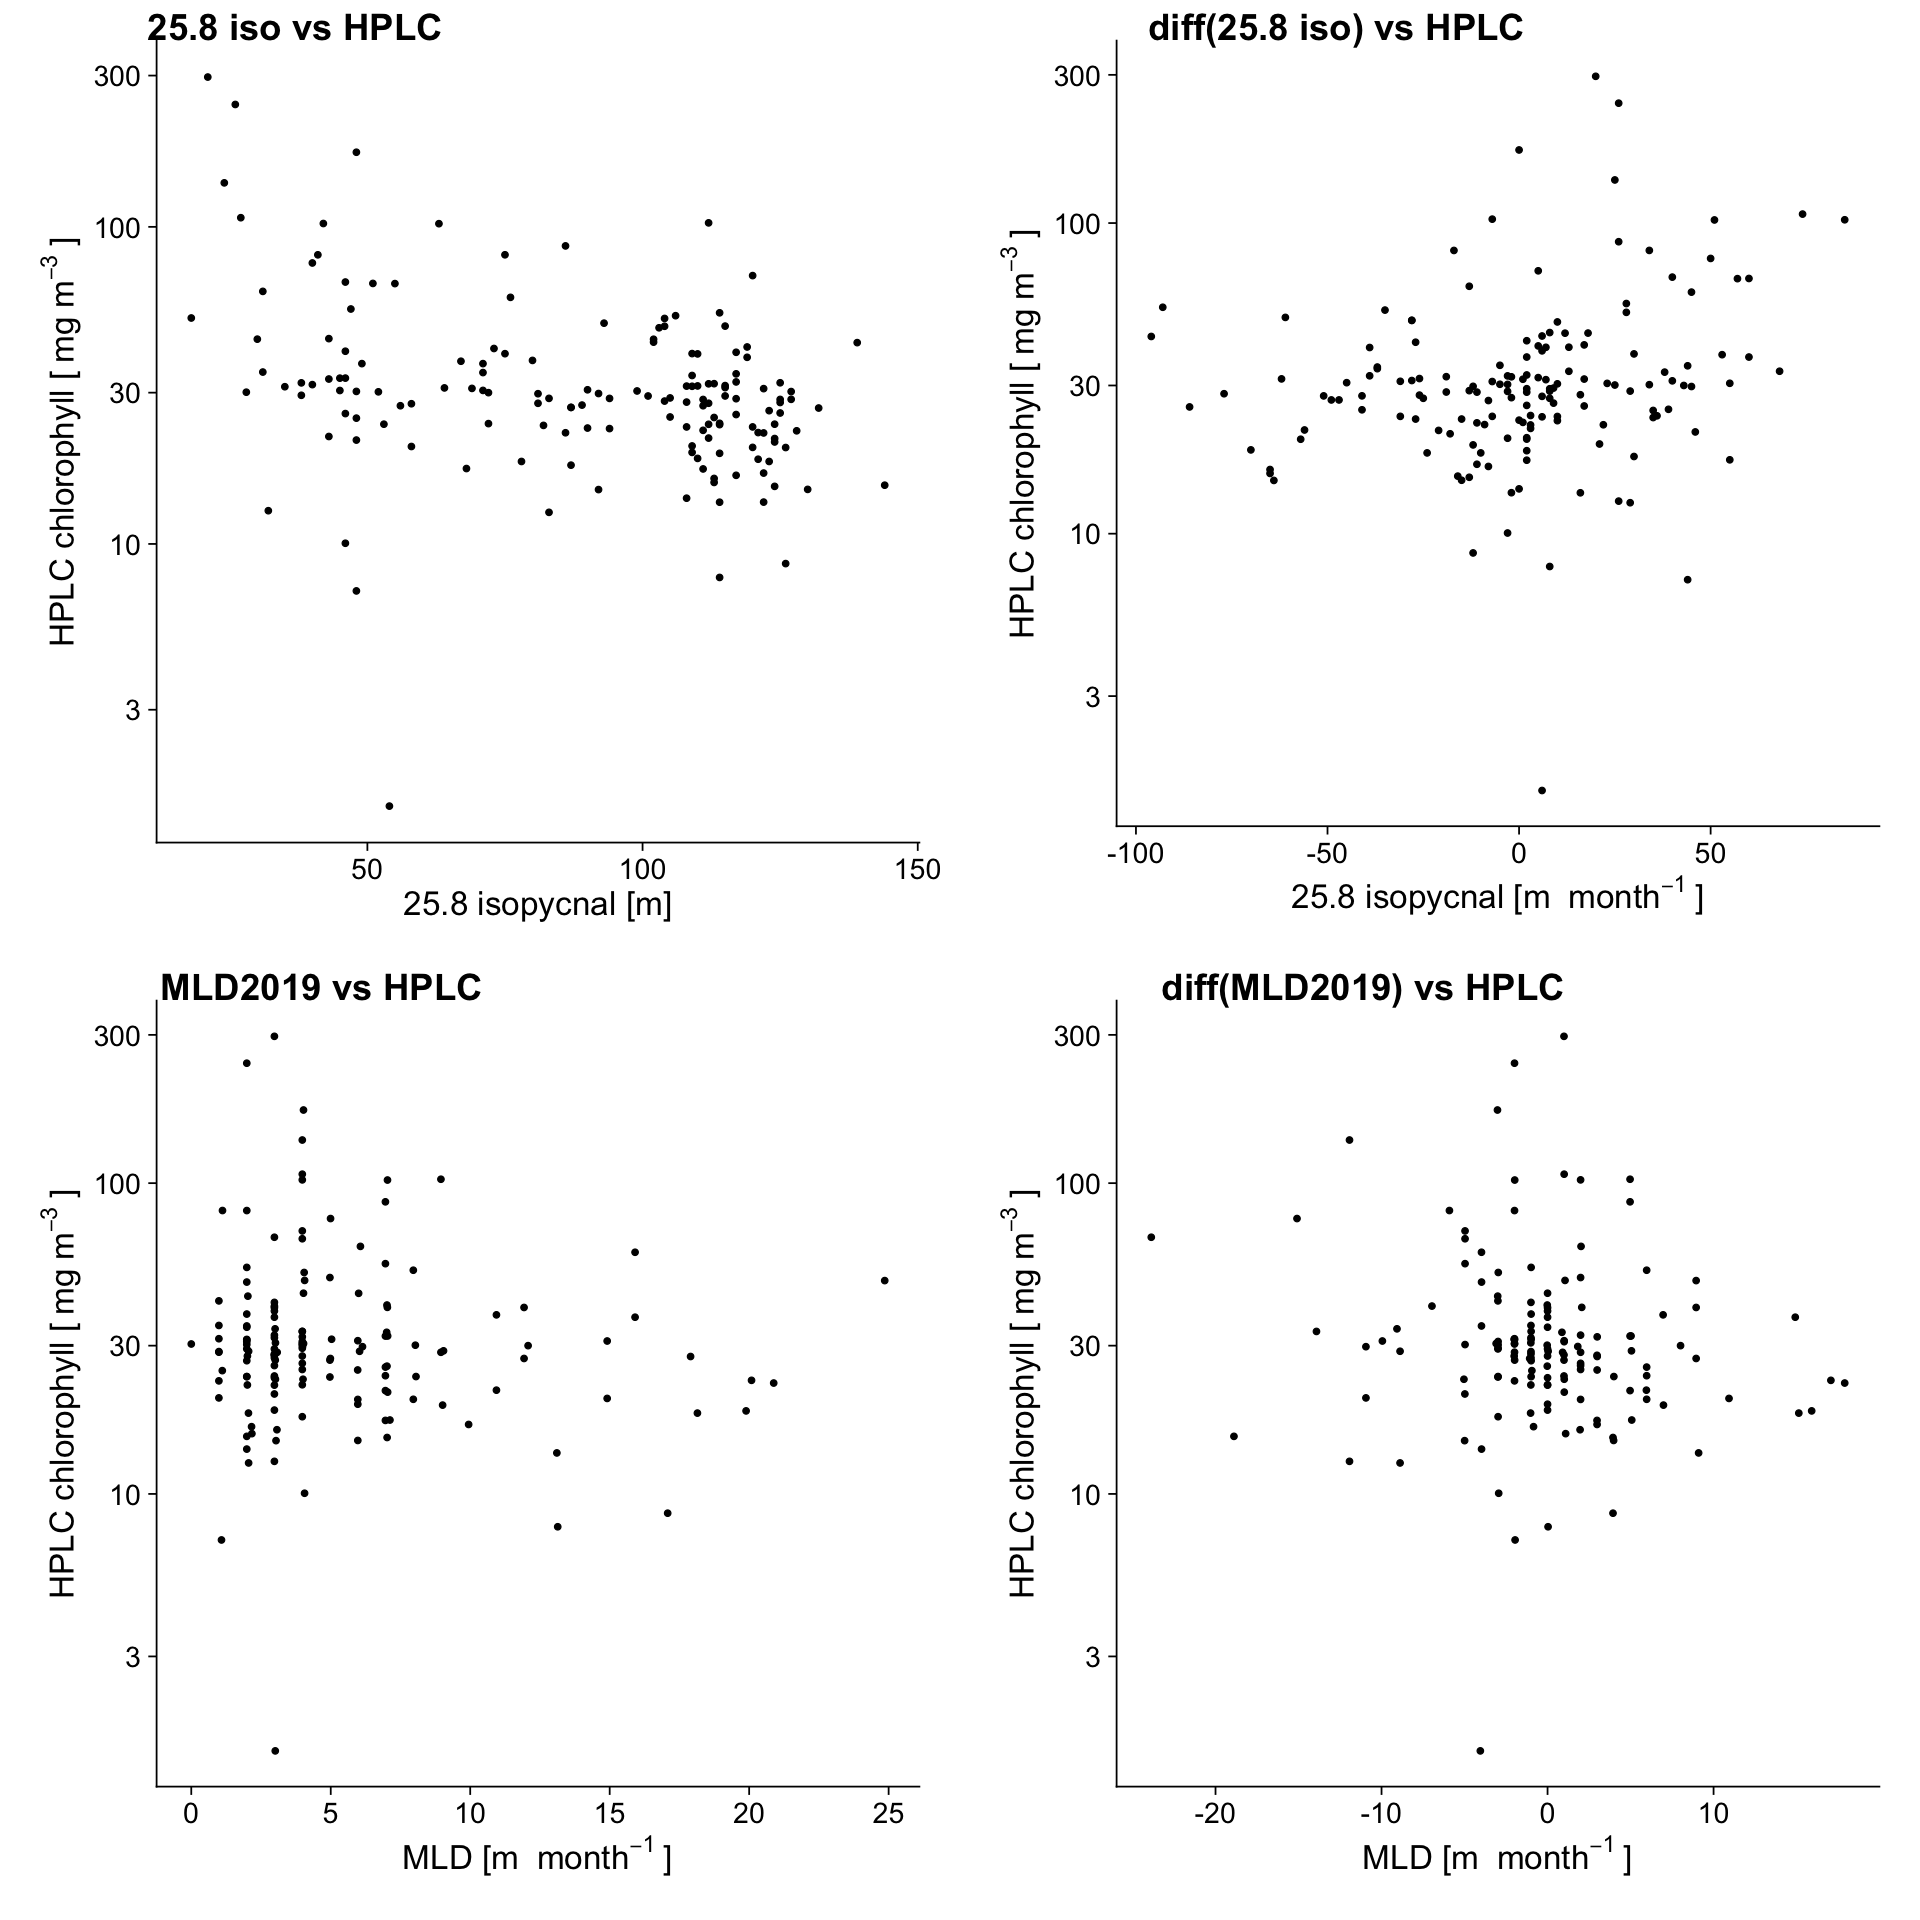

In [472]:
plot_grid(X258vsHPLC,X258diffvsHPLC,
          MLD2019vsHPLC, MLD2019diffvsHPLC,
          labels = c('25.8 iso vs HPLC','diff(25.8 iso) vs HPLC','MLD2019 vs HPLC','diff(MLD2019) vs HPLC'), cols=2 ,label_size = 22, scale=0.95)

# integrate Ni + P + Si

In [414]:
NiINT0 <- data.frame(date = format(niskdat_df$date, "%Y-%m"), Depth_target = niskdat_df$Depth_target , NO3_NO2_USF = niskdat_df$NO3_NO2_USF)

NiINT1 <- NiINT0[NiINT0$Depth_target < 105,]

NiINT2 <- prep_df_ntrplt(NiINT1)
head(NiINT2)

,date,depth,value
,<fct>,<dbl>,<dbl>
1,1995-11,1,NA
2,1995-11,7,NA
3,1995-11,15,NA
4,1995-11,25,NA
5,1995-11,35,NA
6,1995-11,55,NA


In [415]:
NiINT3 <- integrate(NiINT2)

Warning message:
“Factor `date` contains implicit NA, consider using `forcats::fct_explicit_na`”
Warning message:
“Factor `date` contains implicit NA, consider using `forcats::fct_explicit_na`”
Warning message:
“Factor `date` contains implicit NA, consider using `forcats::fct_explicit_na`”


# A tibble: 11 x 3
# Groups:   date [2]
   date    depth value
   <fct>   <dbl> <dbl>
 1 2017-01    55  6.44
 2 2017-01    75  8.79
 3 2017-01   100  8.98
 4 NA          7 NA   
 5 NA         15 NA   
 6 NA         25 NA   
 7 NA         35 NA   
 8 NA         55 NA   
 9 NA         75 NA   
10 NA        100 NA   
11 NA         NA NA   


Warning message:
“Factor `date` contains implicit NA, consider using `forcats::fct_explicit_na`”
Warning message:
“Factor `date` contains implicit NA, consider using `forcats::fct_explicit_na`”


In [416]:
MixN <- merge(MIX,NiINT3)

In [438]:
X258vsN <- 
ggplot(data=MixN, aes(x=X258, y=value_int/100)) + 
geom_point() + theme_cowplot(20)+
ylab(bquote('N[µmol' ~ l^{-1} ~']')) + xlab(bquote('25.8 isopycnal [m]')) #+ ylim(0,50) + xlim(0,200)

In [439]:
MLD2019vsN <- 
ggplot(data=MixN, aes(x=MLD2019, y=value_int/100)) + 
geom_point() + theme_cowplot(20) +
ylab(bquote('N[µmol' ~ l^{-1} ~']')) + xlab(bquote('MLD [m]')) #+ ylim(0,1050) + xlim(0,200)

In [442]:
X258diffvsN <- 
ggplot(data=MixN, aes(x=X258diff, y=value_int/100)) + 
geom_point() + theme_cowplot(20)+
ylab(bquote('N[µmol' ~ l^{-1} ~']')) + xlab(bquote('25.8 isopycnal [m '~ month^{-1} ~']')) #+ ylim(0,50) + xlim(0,200)

In [446]:
MLD2019diffvsN <- 
ggplot(data=MixN, aes(x=MLDIIdiff, y=value_int/100)) + 
geom_point() + theme_cowplot(20) +
ylab(bquote('N[µmol' ~ l^{-1} ~']')) + xlab(bquote('MLD [m '~ month^{-1} ~']')) #+ ylim(0,1050) + xlim(0,200)

Warning message:
“Removed 40 rows containing missing values (geom_point).”
Warning message:
“Removed 41 rows containing missing values (geom_point).”
Warning message:
“Removed 47 rows containing missing values (geom_point).”
Warning message:
“Removed 47 rows containing missing values (geom_point).”


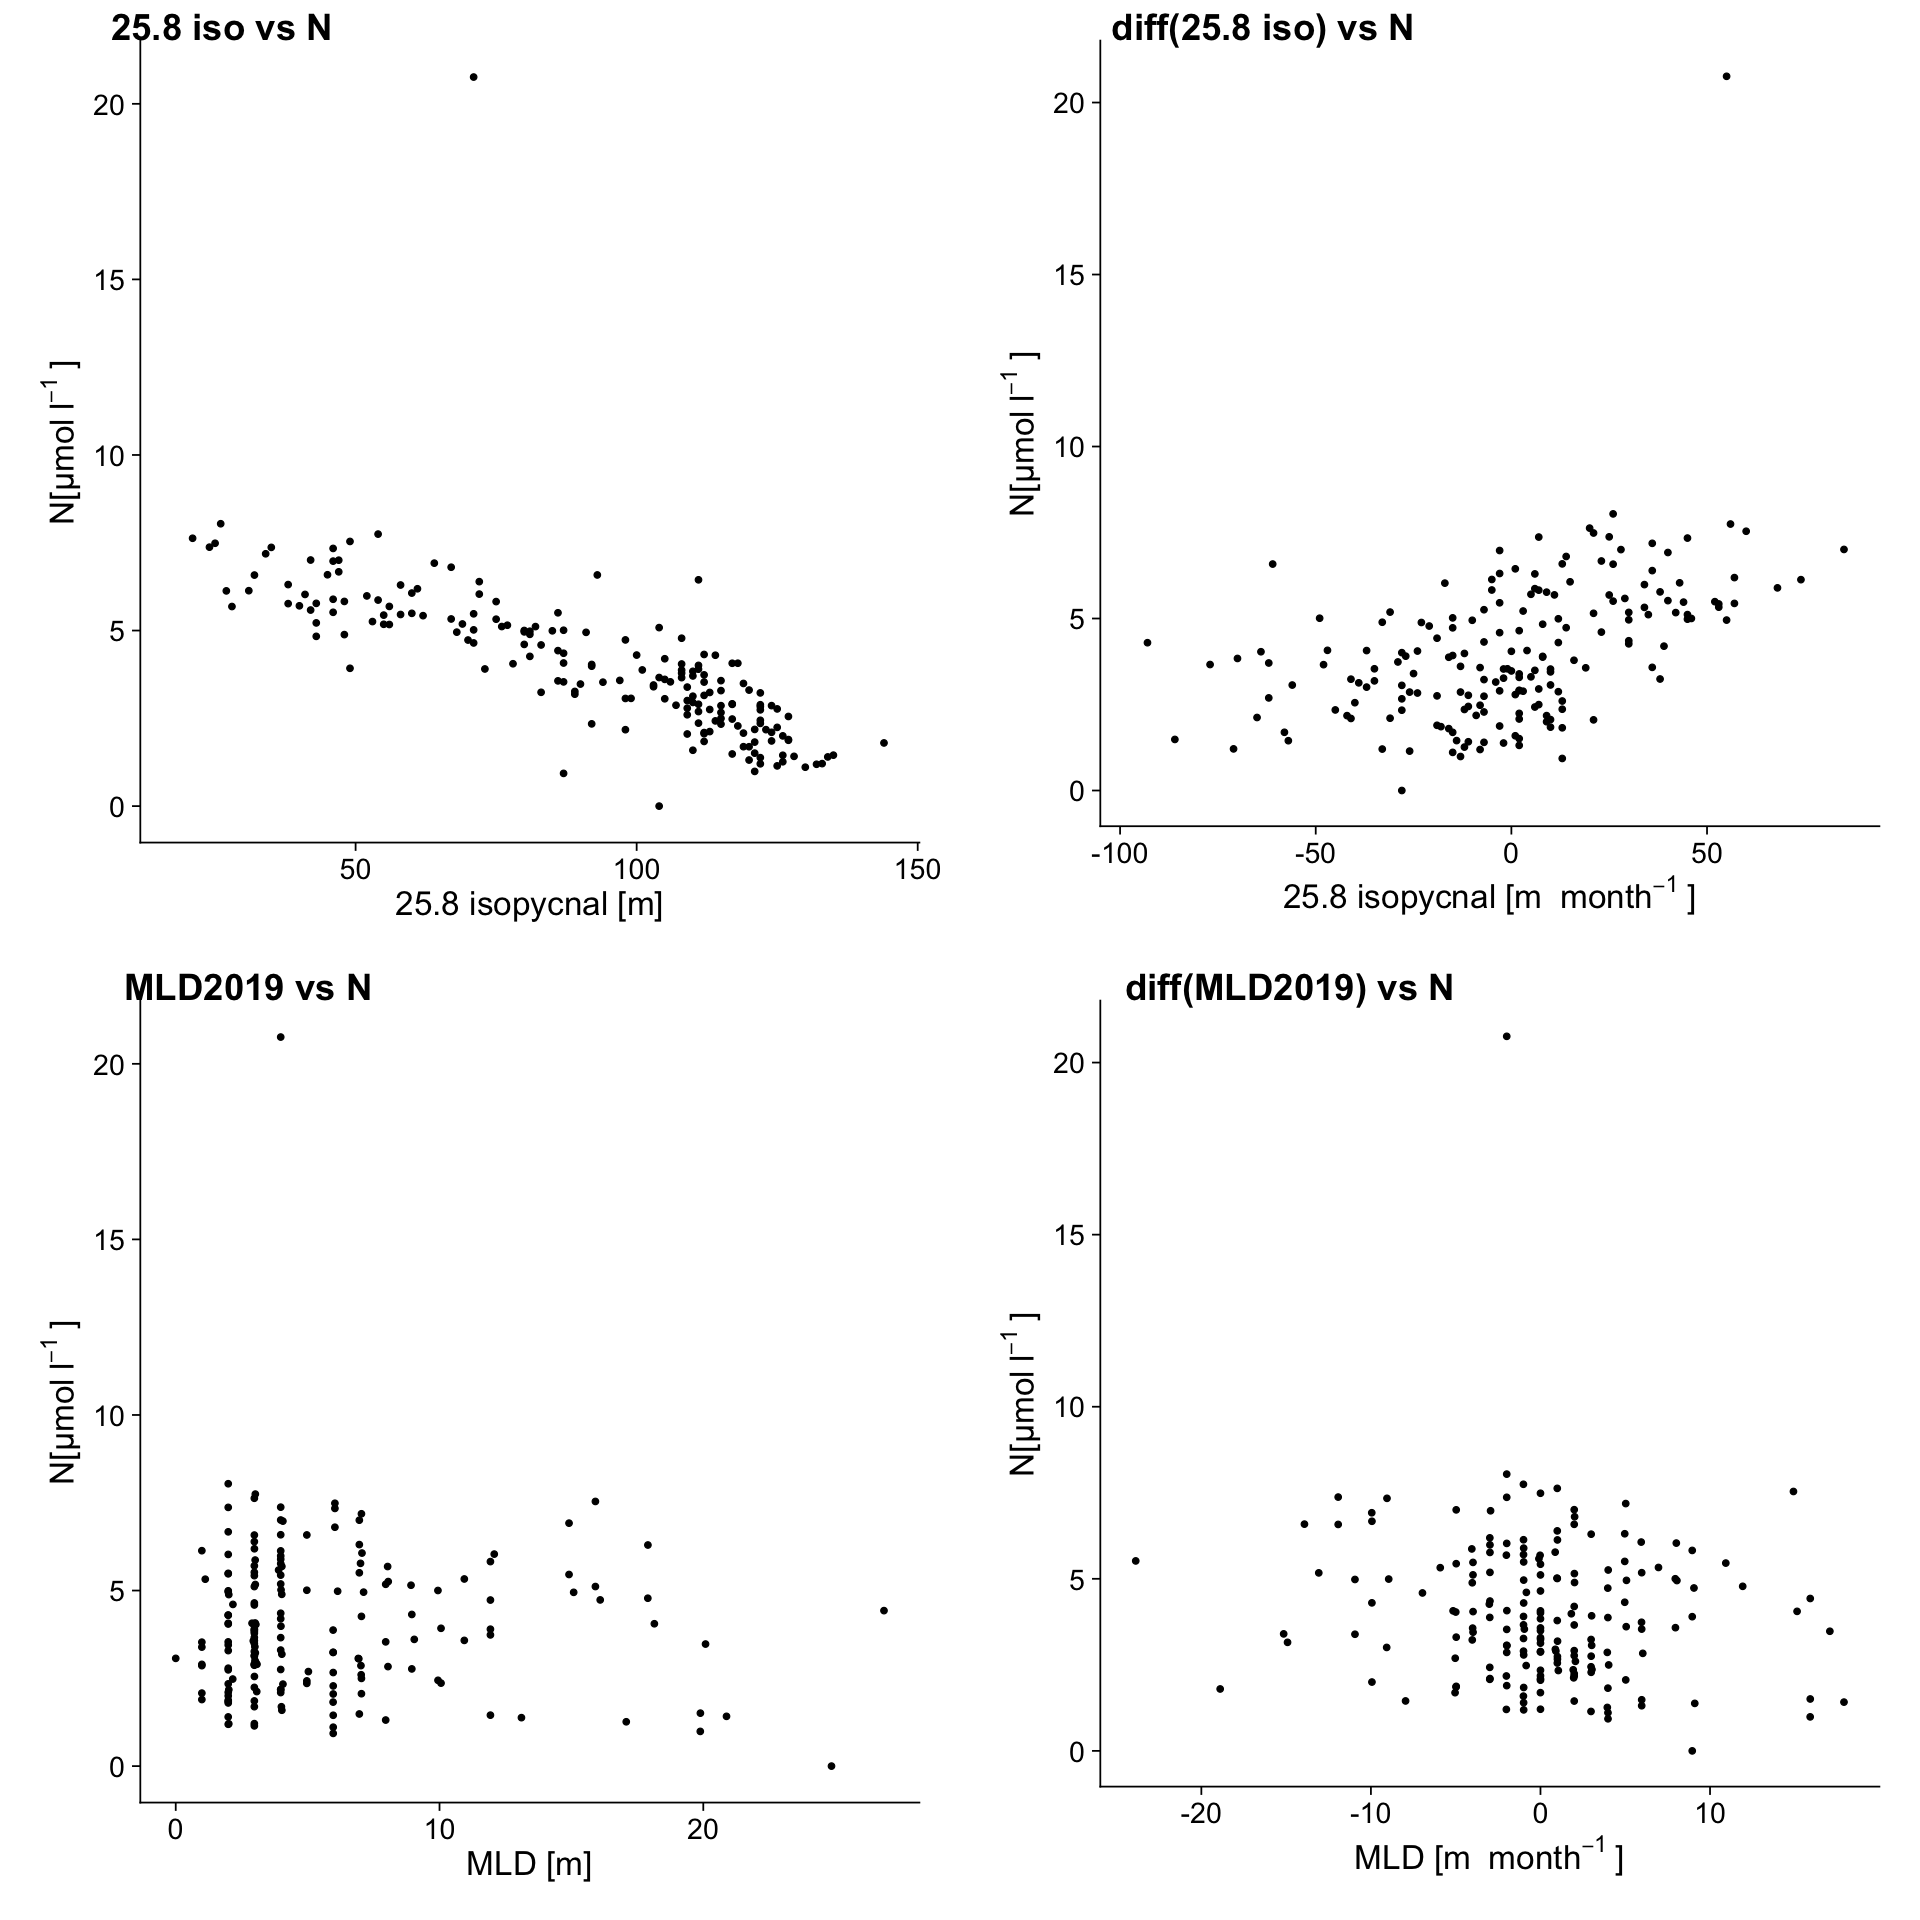

In [450]:
plot_grid(X258vsN,X258diffvsN,
          MLD2019vsN, MLD2019diffvsN,
          labels = c('25.8 iso vs N','diff(25.8 iso) vs N','MLD2019 vs N','diff(MLD2019) vs N'), ncol=2 ,label_size = 22, scale=0.95)

# Phosphate!

In [458]:
PINT0 <- data.frame(date = format(niskdat_df$date, "%Y-%m"), Depth_target = niskdat_df$Depth_target , PO4_USF = niskdat_df$PO4_USF)

PINT1 <- PINT0[PINT0$Depth_target < 105,]

PINT2 <- prep_df_ntrplt(PINT1)
head(PINT2)

,date,depth,value
,<fct>,<dbl>,<dbl>
1,1995-11,1,NA
2,1995-11,7,NA
3,1995-11,15,NA
4,1995-11,25,NA
5,1995-11,35,NA
6,1995-11,55,NA


In [459]:
PINT3 <- integrate(PINT2)

Warning message:
“Factor `date` contains implicit NA, consider using `forcats::fct_explicit_na`”
Warning message:
“Factor `date` contains implicit NA, consider using `forcats::fct_explicit_na`”
Warning message:
“Factor `date` contains implicit NA, consider using `forcats::fct_explicit_na`”


# A tibble: 11 x 3
# Groups:   date [2]
   date    depth value
   <fct>   <dbl> <dbl>
 1 2017-01    55  0.34
 2 2017-01    75  0.6 
 3 2017-01   100  0.63
 4 NA          7 NA   
 5 NA         15 NA   
 6 NA         25 NA   
 7 NA         35 NA   
 8 NA         55 NA   
 9 NA         75 NA   
10 NA        100 NA   
11 NA         NA NA   


Warning message:
“Factor `date` contains implicit NA, consider using `forcats::fct_explicit_na`”
Warning message:
“Factor `date` contains implicit NA, consider using `forcats::fct_explicit_na`”


In [461]:
MixP <- merge(MIX,PINT3)

In [462]:
X258vsP <- 
ggplot(data=MixP, aes(x=X258, y=value_int/100)) + 
geom_point() + theme_cowplot(20)+
ylab(bquote('P [µmol' ~ l^{-1} ~']')) + xlab(bquote('25.8 isopycnal [m]')) #+ ylim(0,50) + xlim(0,200)

In [463]:
MLD2019vsP <- 
ggplot(data=MixP, aes(x=MLD2019, y=value_int/100)) + 
geom_point() + theme_cowplot(20) +
ylab(bquote('P [µmol' ~ l^{-1} ~']')) + xlab(bquote('MLD [m]')) #+ ylim(0,1050) + xlim(0,200)

In [464]:
X258diffvsP <- 
ggplot(data=MixP, aes(x=X258diff, y=value_int/100)) + 
geom_point() + theme_cowplot(20)+
ylab(bquote('P [µmol' ~ l^{-1} ~']')) + xlab(bquote('25.8 isopycnal [m '~ month^{-1} ~']')) #+ ylim(0,50) + xlim(0,200)

In [465]:
MLD2019diffvsP <- 
ggplot(data=MixP, aes(x=MLDIIdiff, y=value_int/100)) + 
geom_point() + theme_cowplot(20) +
ylab(bquote('P [µmol' ~ l^{-1} ~']')) + xlab(bquote('MLD [m '~ month^{-1} ~']')) #+ ylim(0,1050) + xlim(0,200)

Warning message:
“Removed 40 rows containing missing values (geom_point).”
Warning message:
“Removed 41 rows containing missing values (geom_point).”
Warning message:
“Removed 47 rows containing missing values (geom_point).”
Warning message:
“Removed 47 rows containing missing values (geom_point).”


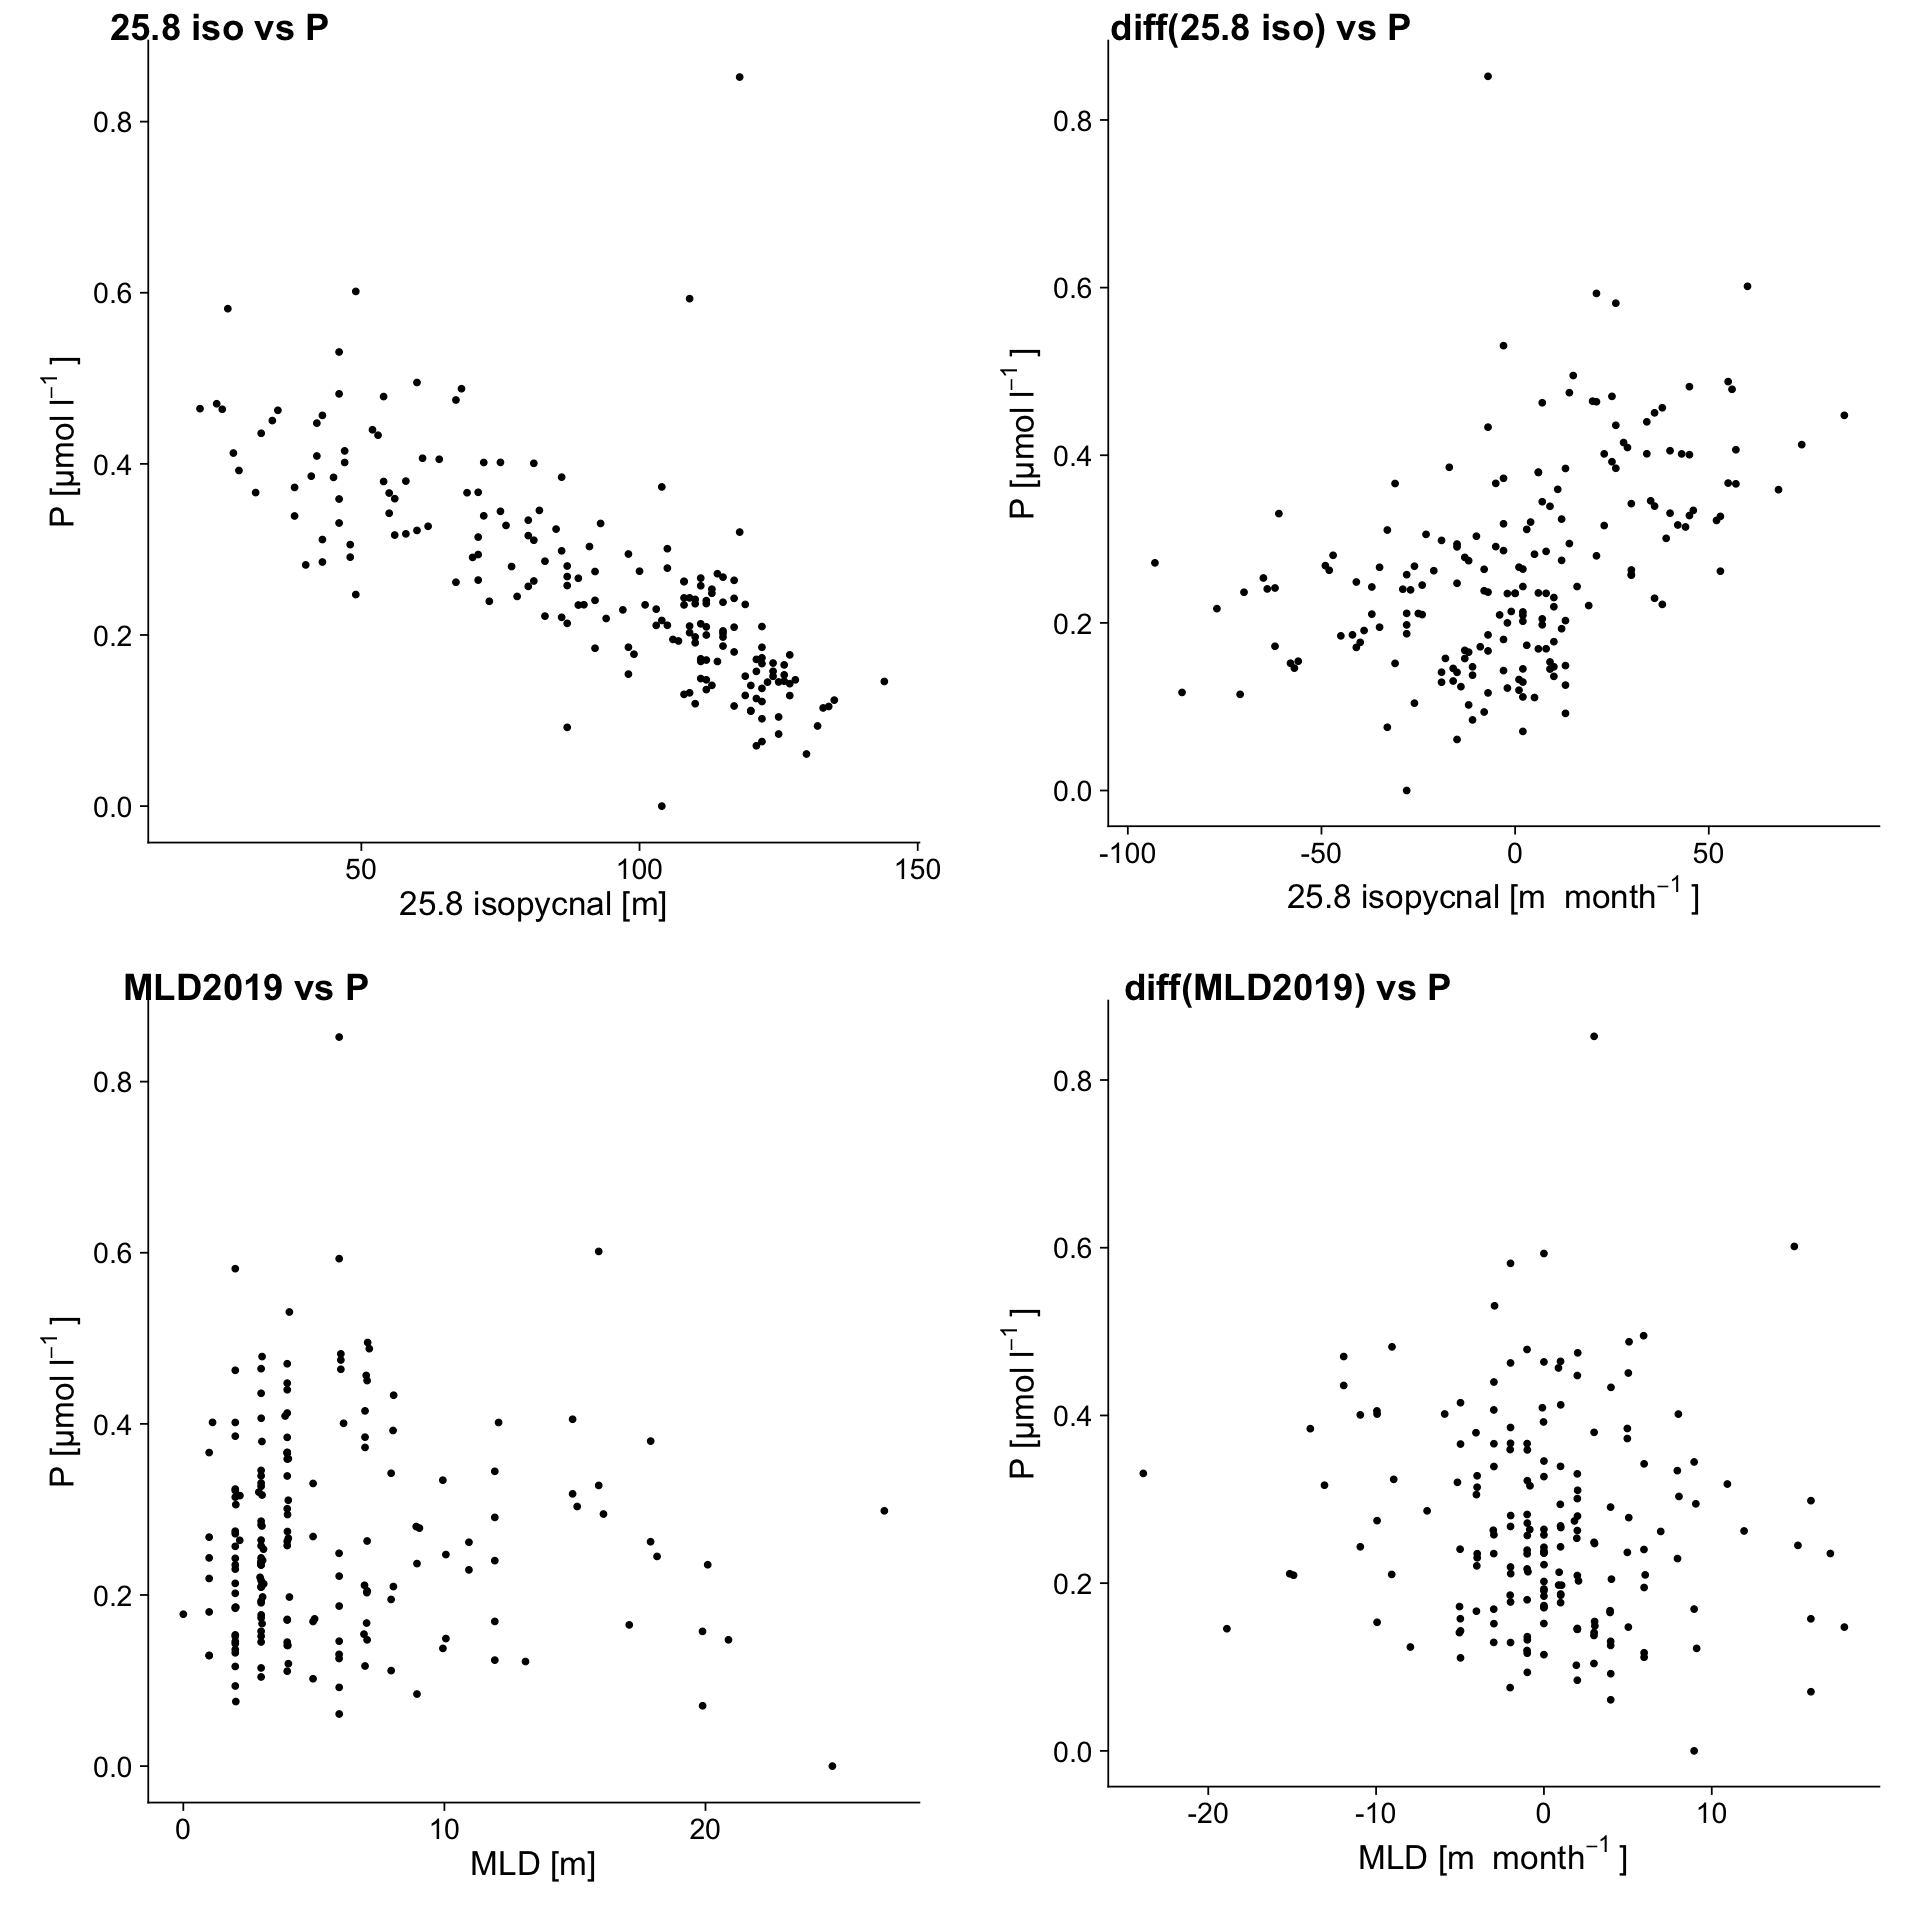

In [466]:
plot_grid(X258vsP,X258diffvsP,
          MLD2019vsP, MLD2019diffvsP,
          labels = c('25.8 iso vs P','diff(25.8 iso) vs P','MLD2019 vs P','diff(MLD2019) vs P'), ncol=2 ,label_size = 22, scale=0.95)

In [ ]:
# NOTES:

-plot all chlorophyll in log space

-check nutrient conc over sigma t, instead of temp

-longer time series of salitinty changes, fresh water input